**MAIN COLAB NOTEBOOK OF PROJECT (CONTAINS MAJORITY CODES)**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_id = '1nCbwq2PktId7IlJmlR5kGn7vvpgiE8vW'
file_url = f'https://drive.google.com/uc?id={file_id}'
data = pd.read_csv(file_url)

In [3]:
data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [4]:
data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
data.shape

(245725, 11)

In [6]:
data.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [7]:
data.duplicated().value_counts()    # to be done before dropping ID

False    245725
dtype: int64

In [8]:
data['ID'].nunique()

245725

In [9]:
data=data.drop('ID',axis=1)

In [10]:
data

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...
245720,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Region_Code          245725 non-null  object
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       216400 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.7+ MB


In [12]:
data.dtypes

Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [13]:
data.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [14]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [15]:
data['Age'].unique()

array([73, 30, 56, 34, 62, 48, 40, 55, 53, 27, 31, 79, 33, 46, 59, 65, 37,
       44, 32, 50, 70, 25, 52, 26, 67, 29, 41, 49, 63, 61, 64, 60, 76, 57,
       36, 28, 58, 43, 35, 71, 82, 45, 42, 54, 47, 78, 51, 68, 83, 39, 84,
       24, 38, 74, 81, 69, 75, 85, 66, 80, 72, 77, 23], dtype=int64)

In [16]:
data['Age'].nunique()

63

In [17]:
data['Region_Code'].value_counts()

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

In [18]:
data['Channel_Code'].unique()

array(['X3', 'X1', 'X2', 'X4'], dtype=object)

In [19]:
data['Occupation'].unique()

array(['Other', 'Salaried', 'Self_Employed', 'Entrepreneur'], dtype=object)

In [20]:
data['Credit_Product'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [21]:
data['Vintage'].nunique()

66

In [22]:
data.isna().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

# **UNIVARIATE ANALYSIS**

In [23]:
# Region_Code:

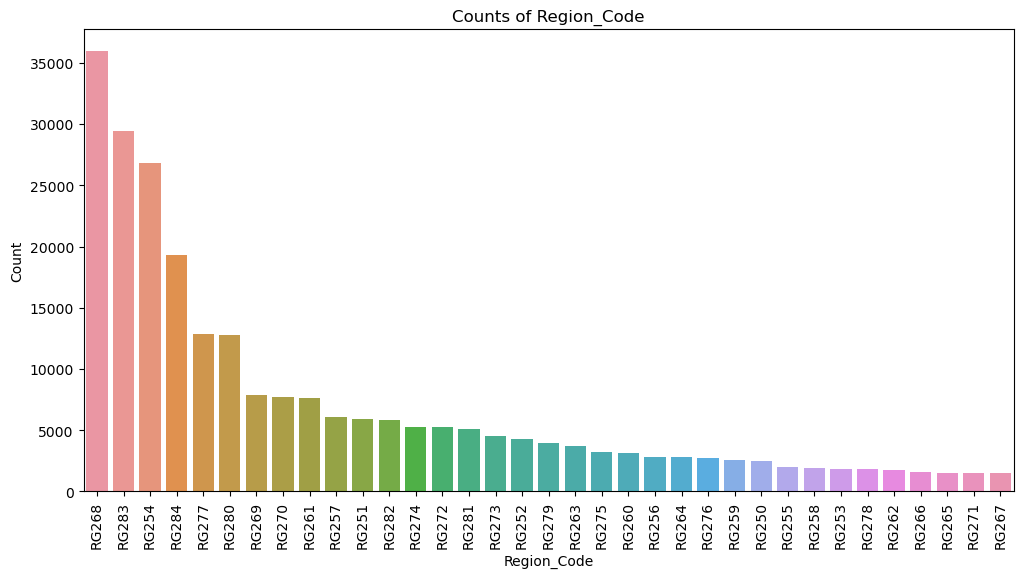

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Region_Code', data=data, order=data['Region_Code'].value_counts().index)
plt.title('Counts of Region_Code')
plt.xlabel('Region_Code')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()
# Customers from the region RG268, RG283, RG254, RG284, and RG277 can be considered as major cities as they have more no of customers

In [25]:
# Vintage :

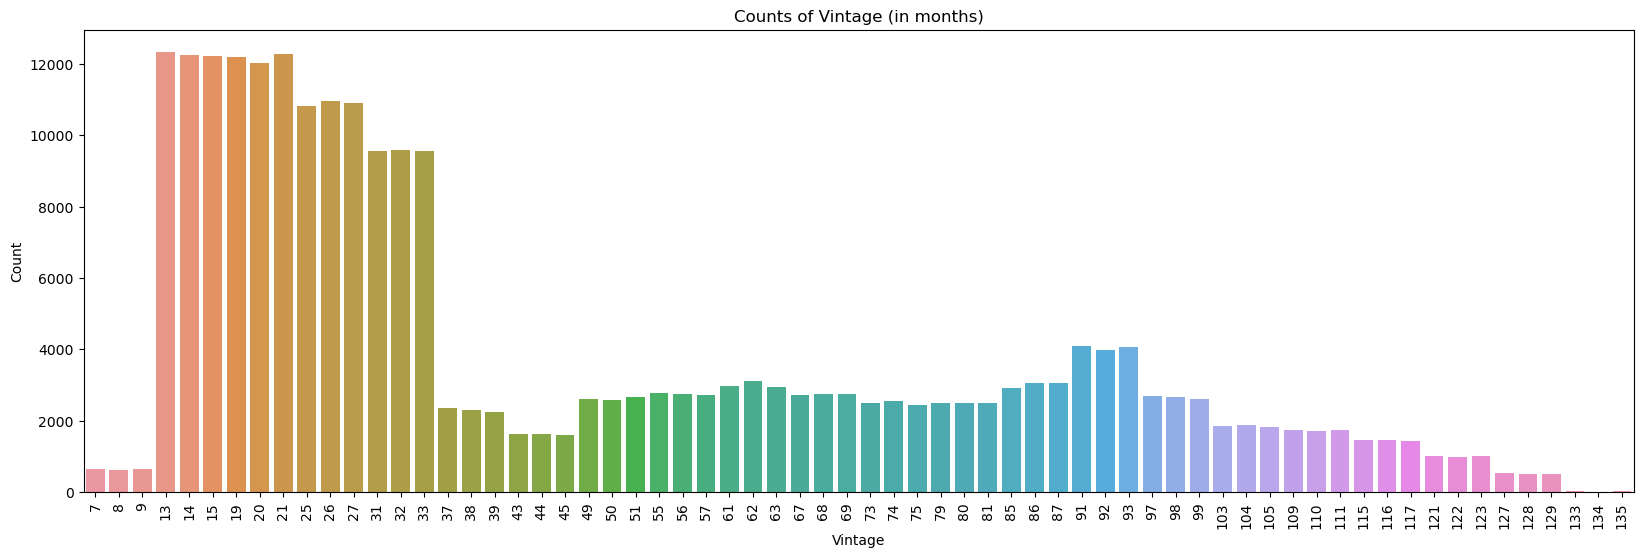

In [26]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Vintage', data=data)
plt.title('Counts of Vintage (in months)')
plt.xlabel('Vintage')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()
# Customers whose vintage range from 13 to 33 are more active with the bank

In [27]:
# Avg_Account_Balance :

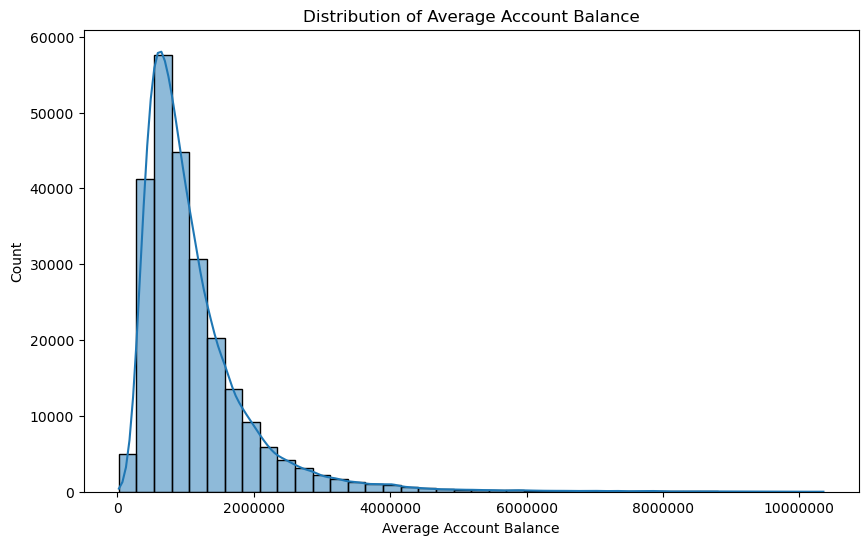

In [28]:

plt.figure(figsize=(10, 6))
sns.histplot(data['Avg_Account_Balance'], bins=40, kde=True)
plt.xlabel('Average Account Balance')
plt.ylabel('Count')
plt.title('Distribution of Average Account Balance')
plt.ticklabel_format(style='plain',axis='x')
plt.show()
# The average account balance of the customer ranges from 20,790 to 1,03,52,009.The histogram shows a skewed distribution towards the right.

In [29]:
column_range = data['Avg_Account_Balance'].max() - data['Avg_Account_Balance'].min()

print( data['Avg_Account_Balance'].max())

10352009


In [30]:
print(data['Avg_Account_Balance'].min())

20790


In [31]:
# Gender:

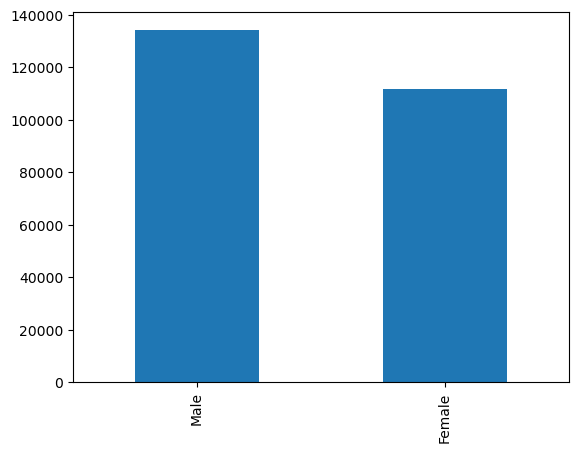

In [32]:
data['Gender'].value_counts().plot.bar()               #There are more male (55%)customers present in the dataset. But the gender of the customer does not really matter in deciding who has a better lead.
plt.show()

In [33]:
data['Gender'].value_counts(normalize=True)

Male      0.546127
Female    0.453873
Name: Gender, dtype: float64

<Axes: xlabel='Occupation', ylabel='count'>

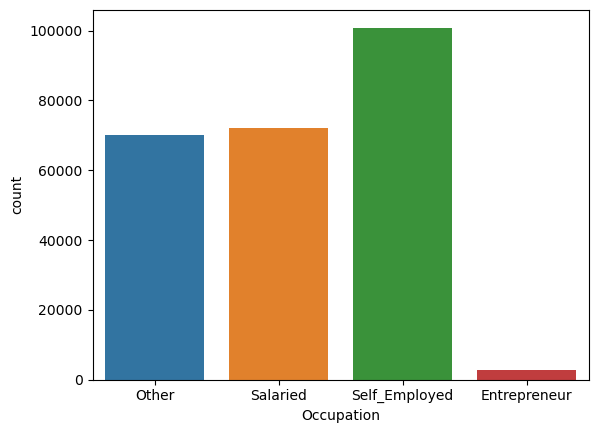

In [34]:
#Occupation
sns.countplot(x='Occupation', data=data)      #the customers who are self employed are more and entrepreneurs are the least

In [35]:
data['Occupation'].value_counts(normalize=True)

Self_Employed    0.410565
Salaried         0.293006
Other            0.285575
Entrepreneur     0.010854
Name: Occupation, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

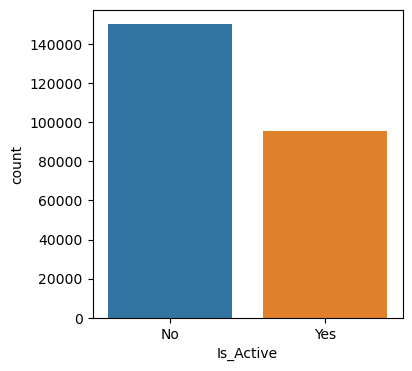

In [36]:
#Is_Active

plt.figure(figsize=(4,4))
sns.countplot(x=data['Is_Active'])      #those who are not active is more as compared to those who are
plt.show

In [37]:
#Is_Lead

<function matplotlib.pyplot.show(close=None, block=None)>

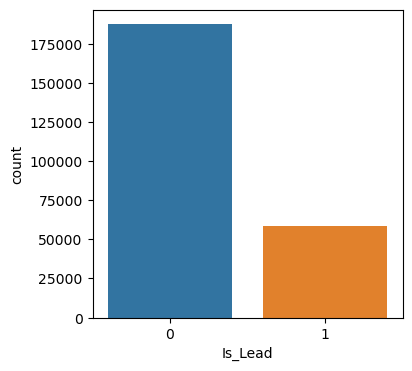

In [38]:
plt.figure(figsize=(4,4))
sns.countplot(x=data['Is_Lead'])
plt.show                       #76% are not interested in taking the card ,only 24% are interested

In [39]:
data['Is_Lead'].value_counts(normalize=True)        #imbalanced data

0    0.762792
1    0.237208
Name: Is_Lead, dtype: float64

In [40]:
#On the basis of personal customer details and the relationship of customer with the bank , using model we will  predict whether the customer will be interested in taking the credit card (1),or not(0)

In [41]:
# Channel Code

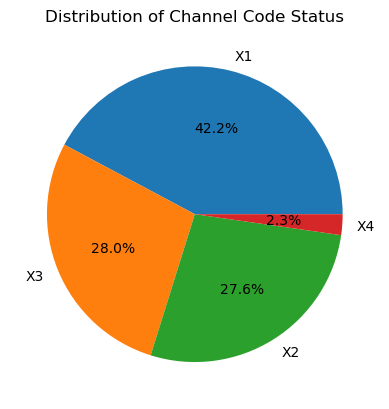

In [42]:
channel_code_counts = data['Channel_Code'].value_counts()
plt.pie(channel_code_counts.values, labels=channel_code_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Channel Code Status')
plt.show()

In [43]:
# Age

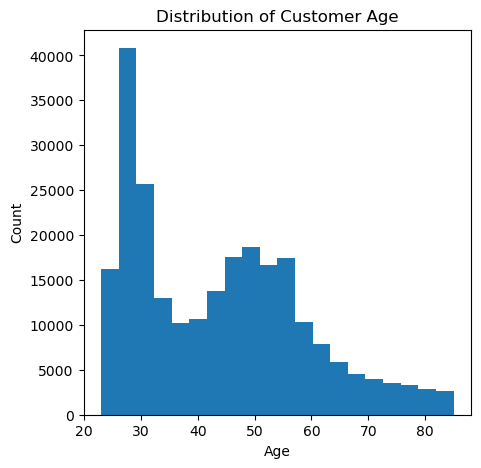

In [44]:
# Plot the histogram of age distribution
plt.figure(figsize=(5, 5))
plt.hist(data['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Customer Age')
plt.show()

In [45]:
# Credit Product

Text(0.5, 0, 'Credit_Product')

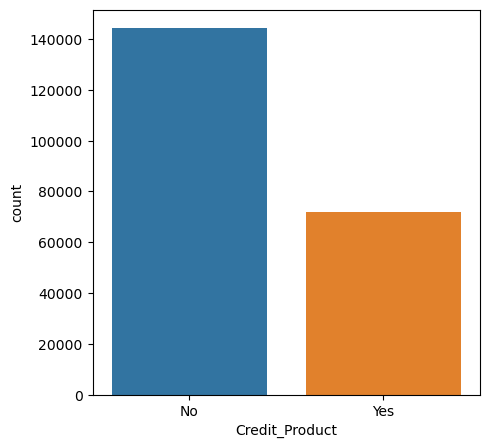

In [46]:
plt.figure(figsize=(5,5))
sns.countplot(data = data, x = 'Credit_Product')
plt.xlabel('Credit_Product')

In [47]:
data['Credit_Product'].value_counts(normalize=True)


No     0.667084
Yes    0.332916
Name: Credit_Product, dtype: float64

# **BIVARIATE ANALYSIS**

Bivariate analysis on VINTAGE

In [48]:
# Vintage v/s Age

C:\Users\user\AppData\Local\Temp\ipykernel_13848\2104652664.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_customers['Age Group'] = 'Young Customers'
C:\Users\user\AppData\Local\Temp\ipykernel_13848\2104652664.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_customers['Age Group'] = 'Old Customers'


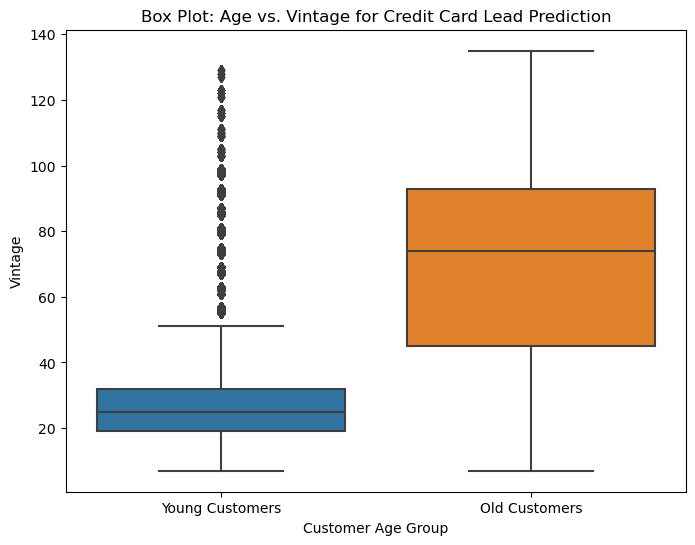

In [49]:
# Define the age threshold to divide the data into two parts
age_threshold = 45

# Filter data for young and old customers
young_customers = data[data['Age'] <= age_threshold]
old_customers = data[data['Age'] > age_threshold]

# Combine the filtered data into a single DataFrame with an additional "Age Group" column
young_customers['Age Group'] = 'Young Customers'
old_customers['Age Group'] = 'Old Customers'
combined_data = pd.concat([young_customers, old_customers])

# Create the box plot using Seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.boxplot(x='Age Group', y='Vintage', data=combined_data)

# Add labels and title
plt.xlabel('Customer Age Group')
plt.ylabel('Vintage')
plt.title('Box Plot: Age vs. Vintage for Credit Card Lead Prediction')

# Show the plot
plt.show()  ##old" customers tend to have higher median Vintage values and greater variability in their Vintage data compared to "young" customers. However, both age groups have outliers in their Vintage data, suggesting that there are individuals with longer or shorter relationships with the bank in both segments.

In [50]:
# Vintage v/s Occupation

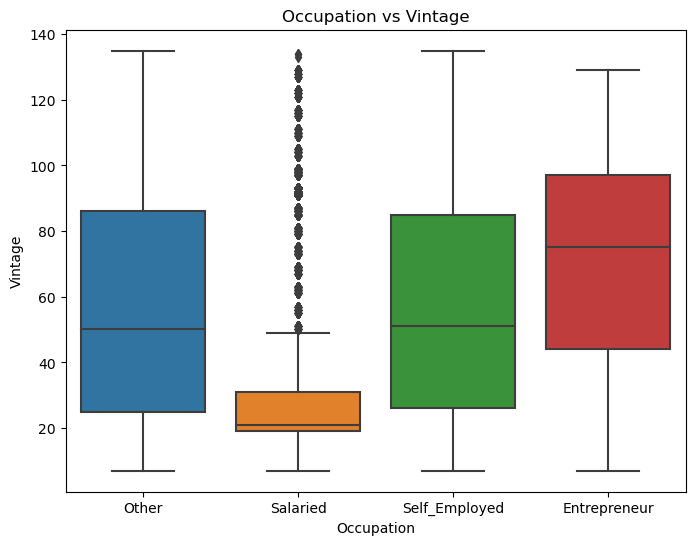

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Occupation', y='Vintage', data=data)
plt.title('Occupation vs Vintage')
plt.show()

#Entrepreneurs are using the account for longer duration ,while salaried are using it for least vintage

In [52]:
# Vintage v/s Credit_Product

In [53]:
data1=pd.read_csv(file_url)

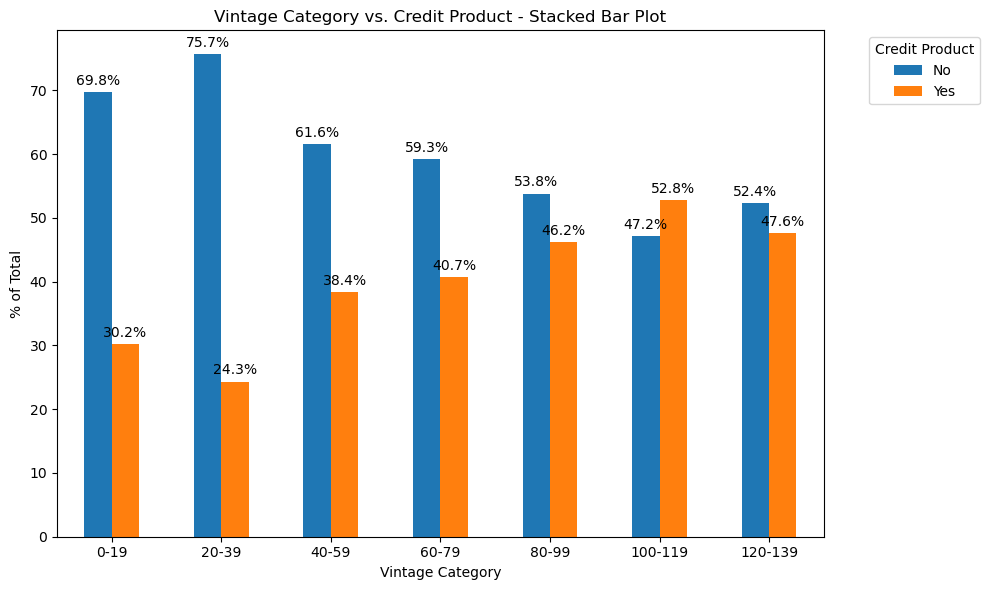

In [54]:
# Convert 'Vintage' to categorical bins (adjust the bin size as needed)
data1['Vintage_Category'] = pd.cut(data1['Vintage'], bins=[0, 20, 40, 60, 80, 100, 120, 140], labels=['0-19', '20-39', '40-59', '60-79', '80-99', '100-119', '120-139'])

# Pivot the DataFrame to get the required data for the stacked bar plot
stacked_data1 = data1.pivot_table(index='Vintage_Category', columns='Credit_Product', aggfunc='size', fill_value=0)

# Calculate the percentage of each category in the 'Credit_Product' column
stacked_data1_percentage = stacked_data1.div(stacked_data1.sum(axis=1), axis=0) * 100

# Create the stacked bar plot
ax = stacked_data1_percentage.plot(kind='bar', figsize=(10, 6))

# Add percentage annotations to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, labels=[f'{x:.1f}%' for x in container.datavalues])

# Customize the plot
plt.xlabel('Vintage Category')
plt.ylabel('% of Total')
plt.title('Vintage Category vs. Credit Product - Stacked Bar Plot')
plt.xticks(rotation=0)
plt.legend(title='Credit Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()    #as vintage increases the %of people interested to take credit product is increasing


In [55]:
# Vintage v/s Avg_Account_Balance

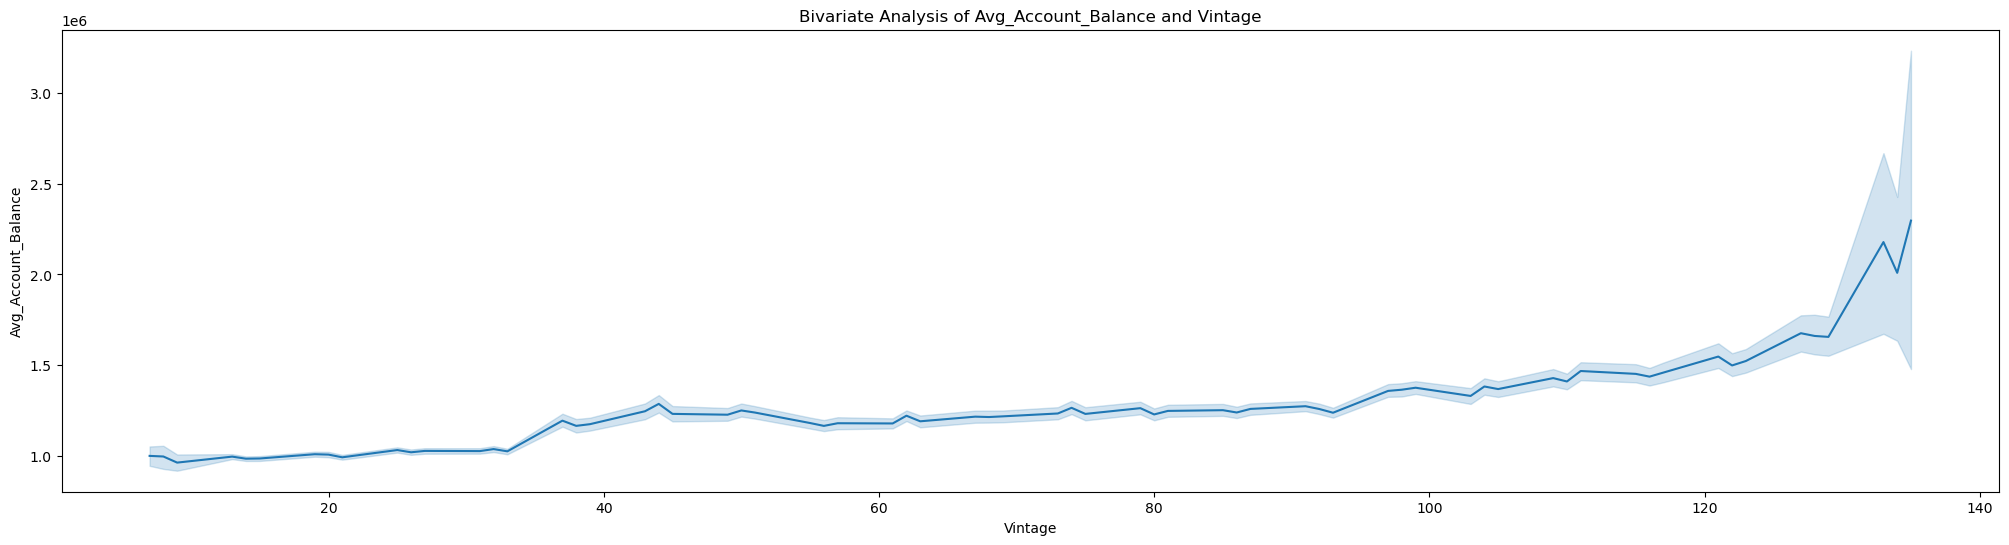

In [56]:
plt.figure(figsize=(25, 6))
sns.lineplot(x='Vintage', y='Avg_Account_Balance', data=data)

# Set the title and labels for the plot
plt.title('Bivariate Analysis of Avg_Account_Balance and Vintage')
plt.xlabel('Vintage')
plt.ylabel('Avg_Account_Balance')

# Display the plot
plt.show()   #As the vintage of the customer increases their average account balance also tends to increase.

In [57]:
# Vintage v/s Is_Lead

Is_Lead      0     1
Vintage             
7          501   147
8          484   135
9          490   148
13       10499  1839
14       10463  1804
...        ...   ...
128        313   188
129        336   163
133         15     3
134          8     6
135         15     4

[66 rows x 2 columns]


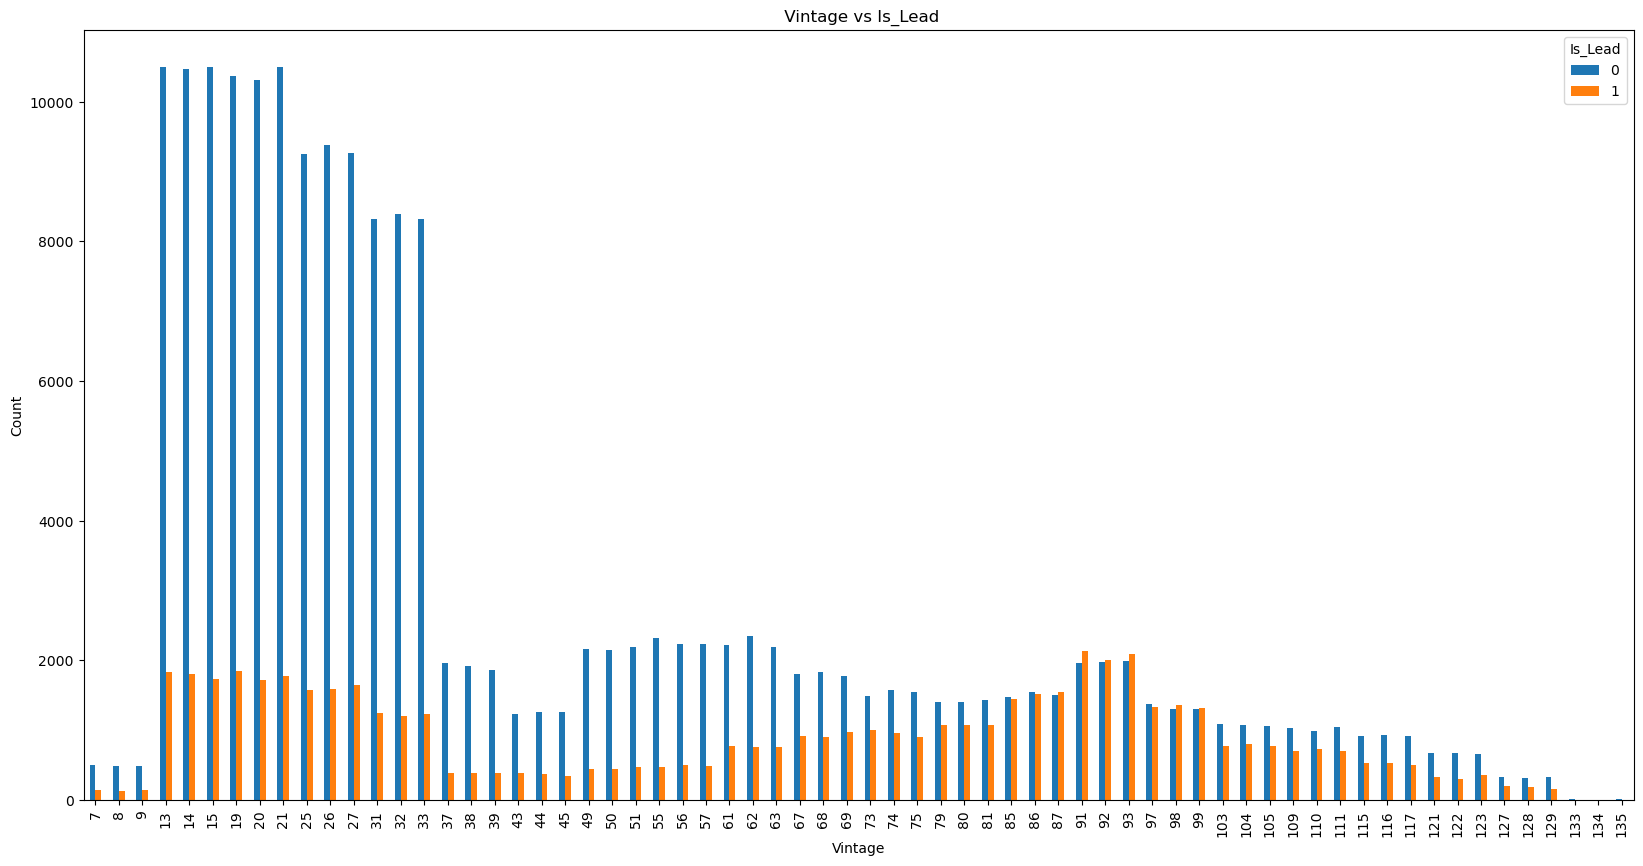

In [58]:
contingency_table = pd.crosstab(data['Vintage'], data['Is_Lead'])
print(contingency_table)
contingency_table.plot(kind='bar',figsize=(20,10))

plt.xlabel('Vintage')
plt.ylabel('Count')
plt.title(' Vintage vs Is_Lead')

plt.legend(title='Is_Lead')

plt.show()

# We can observe that as vintage increases people who are interested to take credit  card also increases.

Bivariate Analysis on Region Code

In [59]:
# Region_Code v/s Credit_Product

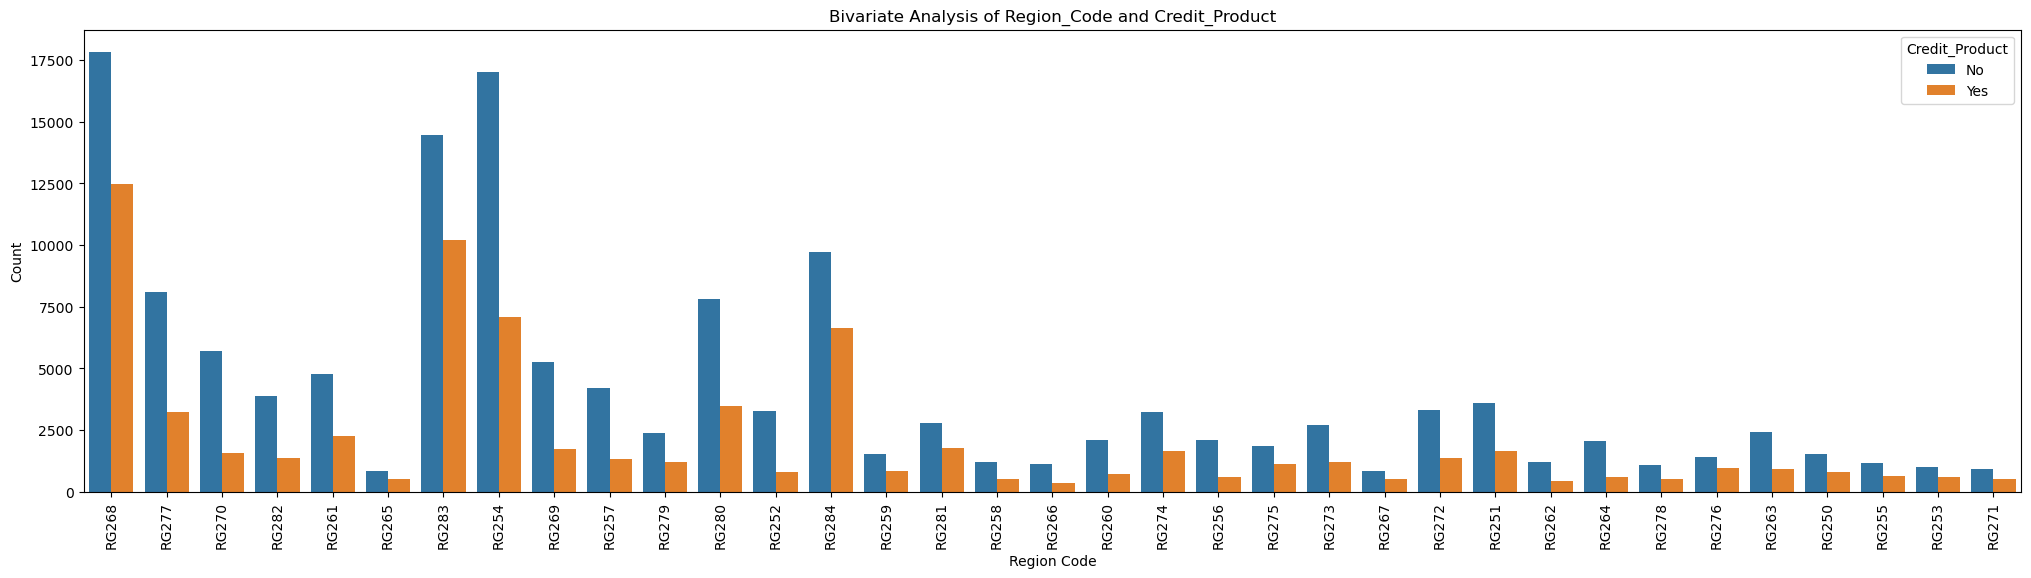

In [60]:
plt.figure(figsize=(25, 6))
# Create a bivariate plot of Region_Code and Credit_Product columns
sns.countplot(data=data, x='Region_Code', hue='Credit_Product')

# Set the title and labels for the plot
plt.title('Bivariate Analysis of Region_Code and Credit_Product')
plt.xlabel('Region Code')
plt.ylabel('Count')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()     # The customers from 5 major cities are the ones who has taken more credit product.

In [61]:
# Region_Code v/s Is_Lead

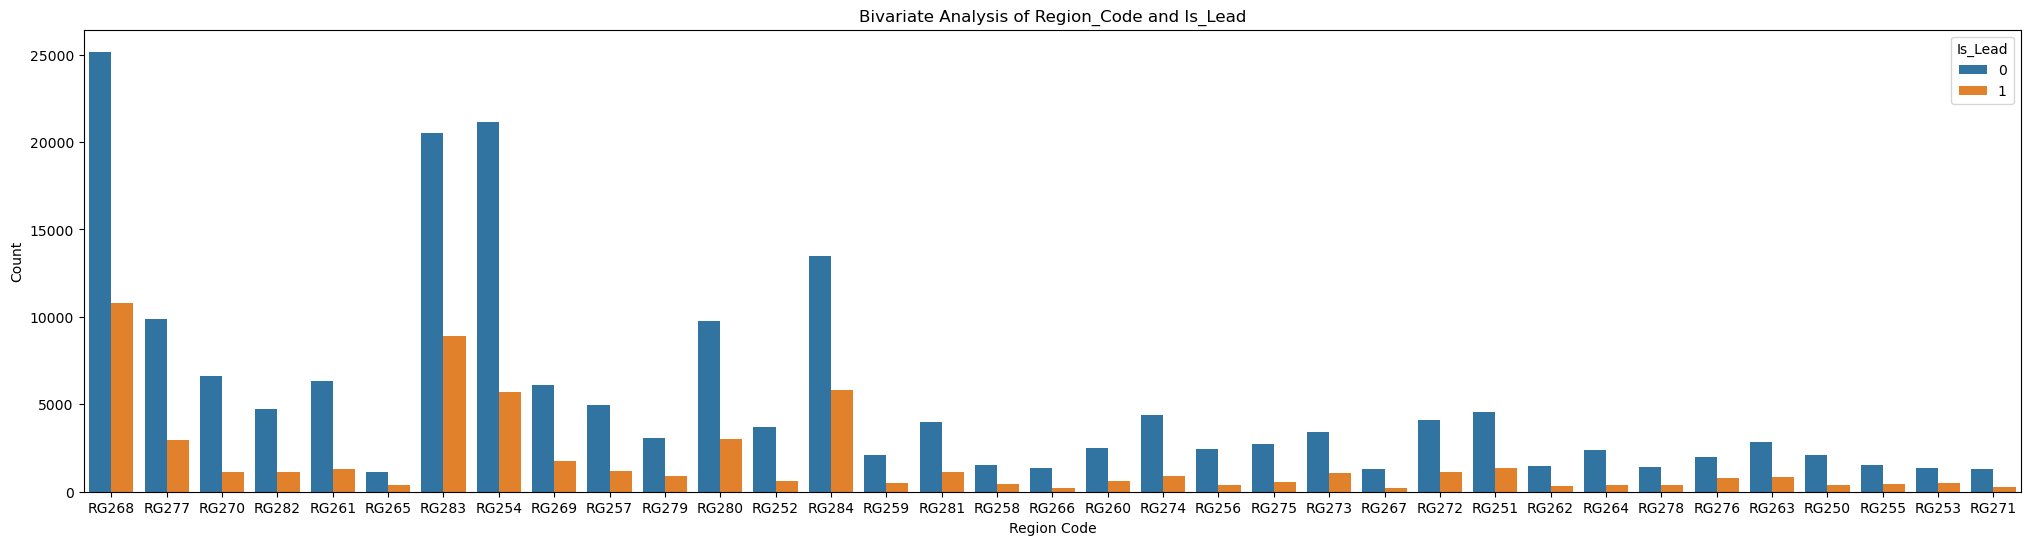

In [62]:
plt.figure(figsize=(25, 6))
# Create a bivariate plot of Region_Code and Is_Lead columns
sns.countplot(data=data, x='Region_Code', hue='Is_Lead')

# Set the title and labels for the plot
plt.title('Bivariate Analysis of Region_Code and Is_Lead')
plt.xlabel('Region Code')
plt.ylabel('Count')

# Display the plot
plt.show()     #RG283,RG254,RG284,RG277 can be considered  as 5 major cities with highest no of customers . The persons interested to take credit card are also more in RG268,RG283,RG284 compared to all other cities .

<Figure size 2000x1500 with 0 Axes>

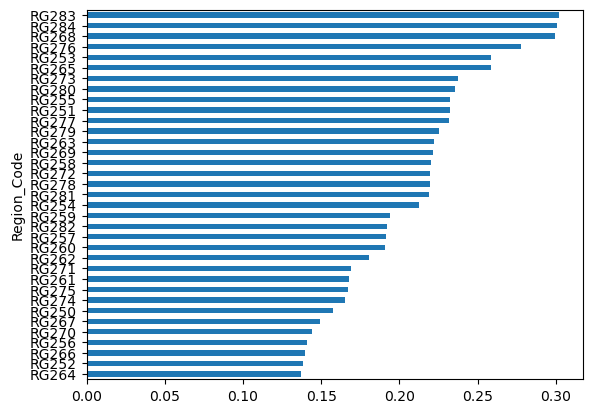

<Figure size 2000x1500 with 0 Axes>

In [63]:
data.groupby('Region_Code')['Is_Lead'].mean().sort_values().plot(kind = 'barh')
plt.figure (figsize=(20,15))   #keep for reference)

Bivariate Analysis on Average Account Balance

In [64]:
# Avg_Account_Balance v/s Is_Active

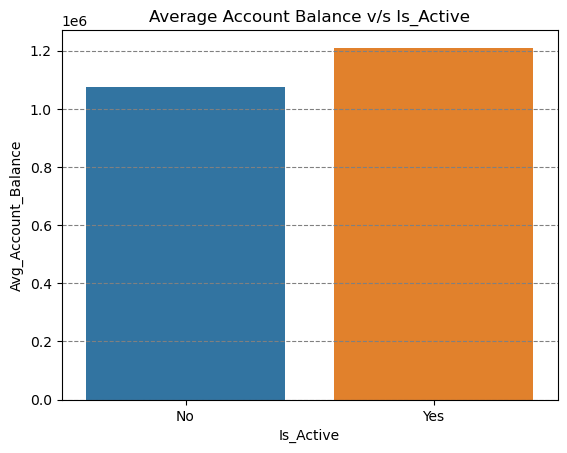

In [65]:
sns.barplot(x='Is_Active', y='Avg_Account_Balance', data=data, errorbar = None)
ax = plt.grid(linestyle="--",axis='y',color='gray')
plt.title('Average Account Balance v/s Is_Active')
plt.show()
## The customers whose average account balance is more than 10,30,000 are more active.

In [66]:
# Avg_Account_Balance v/s Region_Code

C:\Users\user\AppData\Local\Temp\ipykernel_13848\1814134211.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region_Code', y='Avg_Account_Balance', data=filtered_df, ci = None)


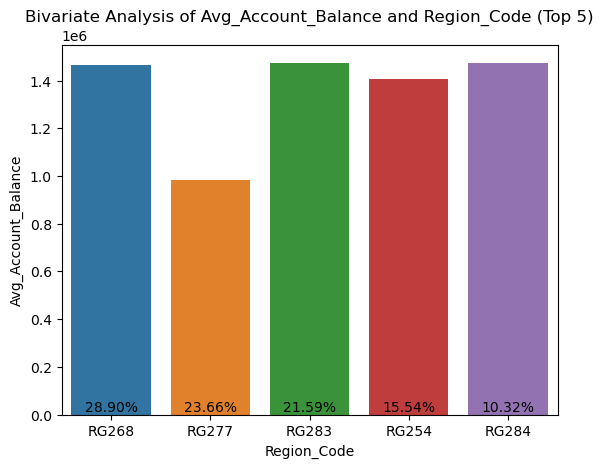

In [67]:
# Filter the dataframe to include only the 5 Region_Code

region_counts = data['Region_Code'].value_counts()
sorted_region = region_counts.sort_values(ascending=False)
top_5_region = sorted_region.head(5)
top_5_region_names = top_5_region.index.tolist()
filtered_df = data[data['Region_Code'].isin(top_5_region_names)]

# Calculate the percentage of each Region_Code
region_percentage = filtered_df['Region_Code'].value_counts(normalize=True) * 100

# Create a bivariate plot of Avg_Account_Balance column with Region_Code
sns.barplot(x='Region_Code', y='Avg_Account_Balance', data=filtered_df, ci = None)

# Set the title and labels for the plot
plt.title('Bivariate Analysis of Avg_Account_Balance and Region_Code (Top 5)')
plt.xlabel('Region_Code')
plt.ylabel('Avg_Account_Balance')

# Add percentage labels to the bars
for i, v in enumerate(region_percentage):
    plt.text(i, v, f"{v:.2f}%", ha='center', va='bottom')

# Display the plot
plt.show()
 ## The customers from the top 5 region their avg account balance percentile is shown and they are having the higesht average account balance compared to others.

In [68]:
# Avg_Account_Balance v/s Is_Lead

In [69]:
data1 = pd.read_csv(file_url)

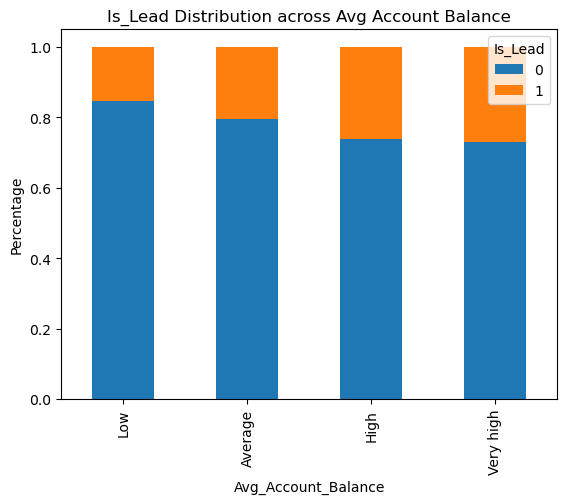

In [70]:
# check if Avg_Account_Balance has any impact on Is_Lead.
bins=[10000,100000,800000,3000000,8000000]
group=['Low','Average','High', 'Very high']
data1['Avg_Account_Balance_bin']=pd.cut(data1['Avg_Account_Balance'],bins,labels=group)
Avg_Account_Balance_bin=pd.crosstab(data1['Avg_Account_Balance_bin'],data1['Is_Lead'])
Avg_Account_Balance_bin.div(Avg_Account_Balance_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Avg_Account_Balance')
plt.ylabel('Percentage')
plt.title('Is_Lead Distribution across Avg Account Balance')
plt.show()        #As the avg account balance increases,the people who are interested to take credit card is also increasing .

**Bivariate Analysis on Gender**

In [71]:
#Gender vs Age

Gender  Female   Male
Age                  
20-24     4188   3025
25-29    34700  26227
30-34    14680  12987
35-39     7789   9273
40-44     9503  13674
45-49    11903  18747
50-54     9525  16401
55-59     6282  12223
60-64     4052   7927
65-69     2689   4963
70-74     2452   3698
75+       2223   3093


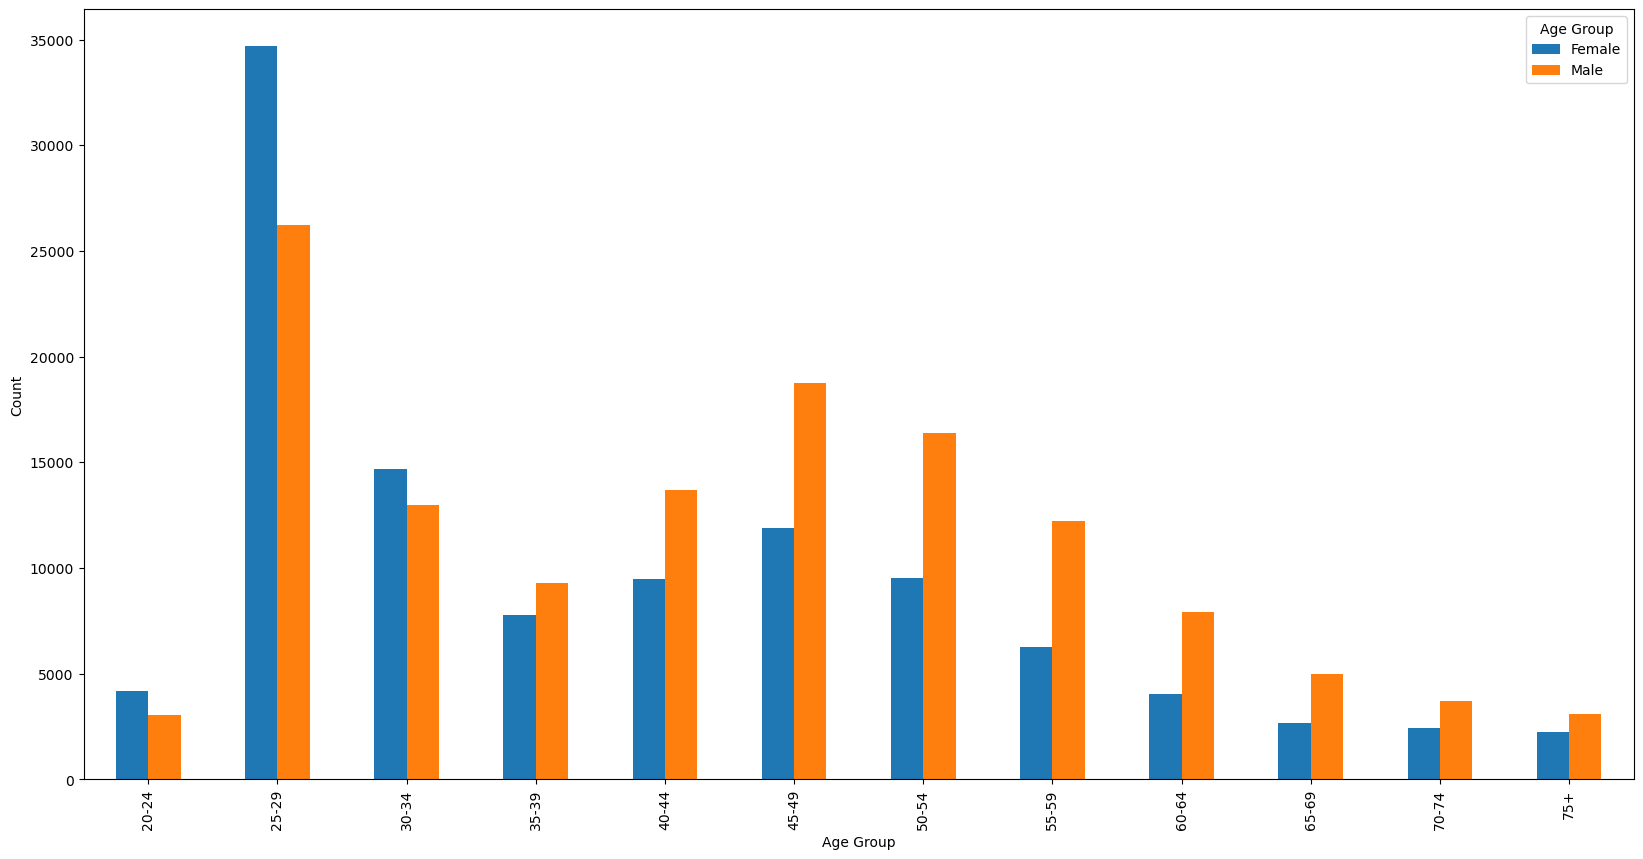

In [72]:
age_groups = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75+']

# Create a contingency table with age groups
contingency_table = pd.crosstab(pd.cut(data['Age'], bins=range(0, 81, 5), labels=age_groups), data['Gender'])

print(contingency_table)

# Plot the contingency table
contingency_table.plot(kind='bar', figsize=(20, 10))
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()

# Till the age of 34,females are more than males, as age progresses the females are less than males

In [73]:
#Gender vs Occupation

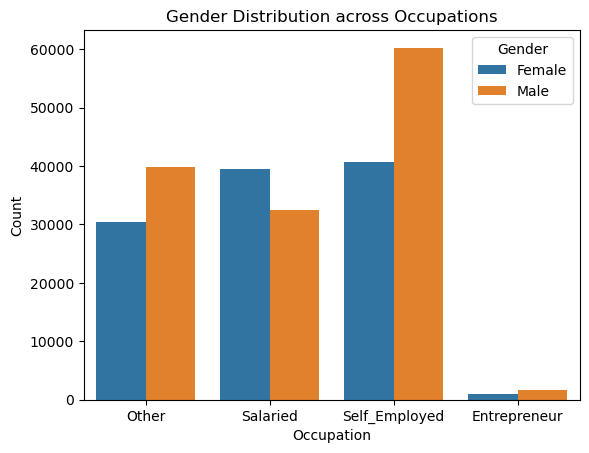

In [74]:
sns.countplot(x='Occupation', hue='Gender', data=data)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Gender Distribution across Occupations')
plt.show()


#females are more in salaried only ,while males are more in all others

**Bivariate Analysis of Is_Active**

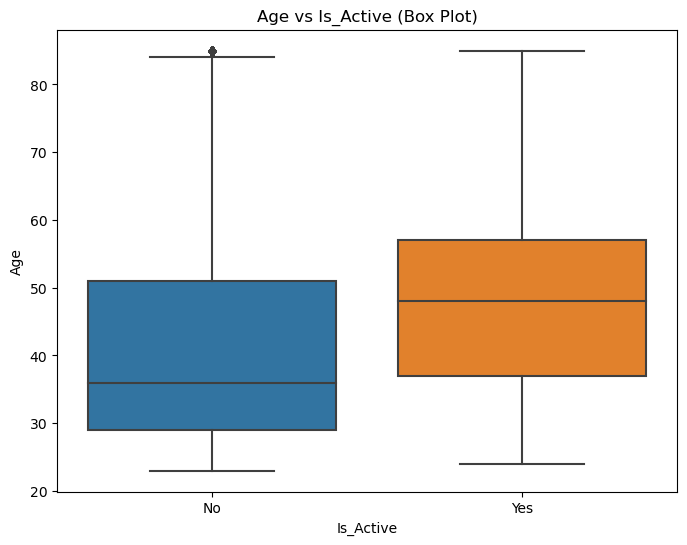

In [75]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Is_Active', y='Age', data=data)
plt.xlabel('Is_Active')
plt.ylabel('Age')
plt.title('Age vs Is_Active (Box Plot)')
plt.show()

#older people are more active as compared to younger ones

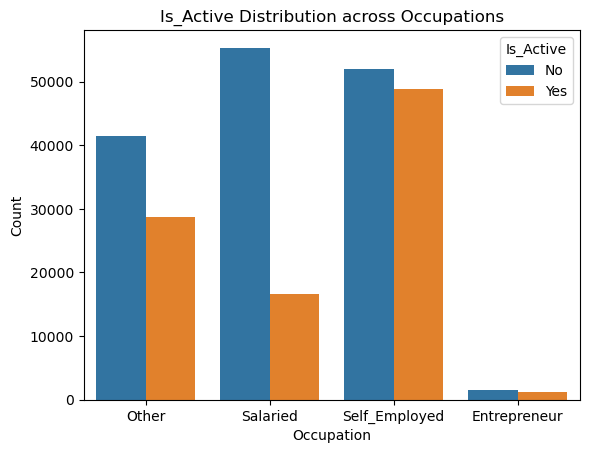

In [76]:
sns.countplot(x='Occupation', hue='Is_Active', data=data)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Is_Active Distribution across Occupations')
plt.show()

#self employed and entrepreneurs are more active , salaried are least

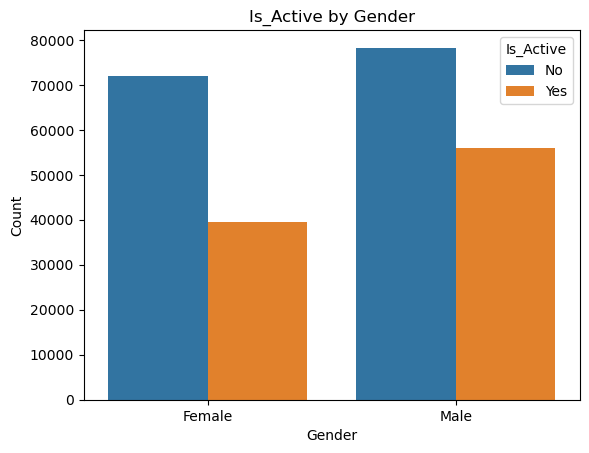

In [77]:
#gender vs is active
sns.countplot(x='Gender', hue='Is_Active', data=data)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Is_Active by Gender')
plt.legend(title='Is_Active')
plt.show()

#males are more active as compared to females

**Bivariate Analysis on Is_Lead**

In [78]:
#Gender vs Is_Lead

In [79]:
contingency_table = pd.crosstab(data['Gender'], data['Is_Lead'])
print(contingency_table)

Is_Lead      0      1
Gender               
Female   88823  22705
Male     98614  35583


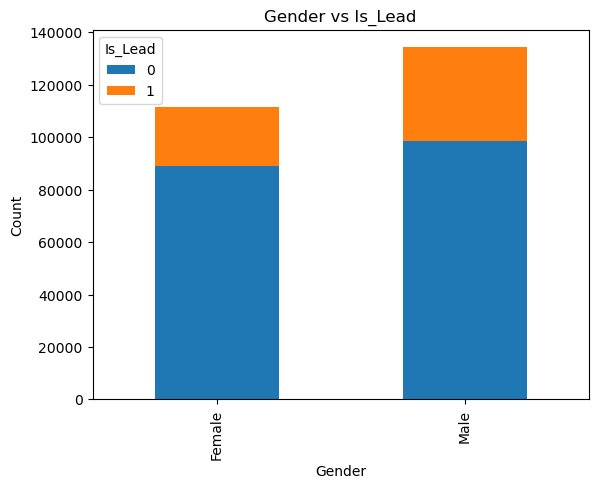

In [80]:
contingency_table.plot(kind='bar', stacked=True)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs Is_Lead')
plt.show()

#males are more interested in taking the credit card

In [81]:
#Occupation vs Is_Lead

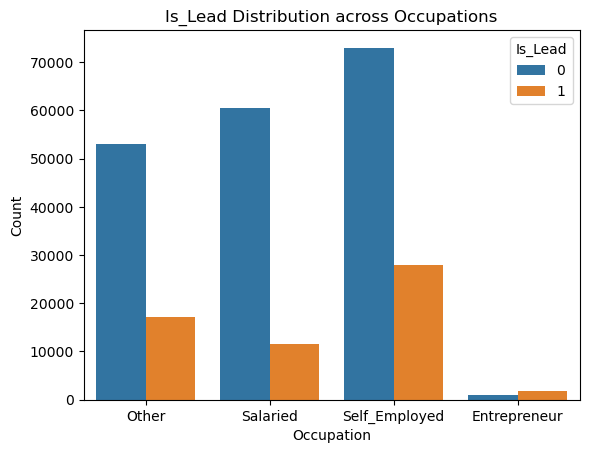

In [82]:

sns.countplot(x='Occupation', hue='Is_Lead', data=data)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Is_Lead Distribution across Occupations')
plt.show()

#entrepreneurs show  most interest in taking credit card , while salaried show least interest

<Axes: ylabel='Occupation'>

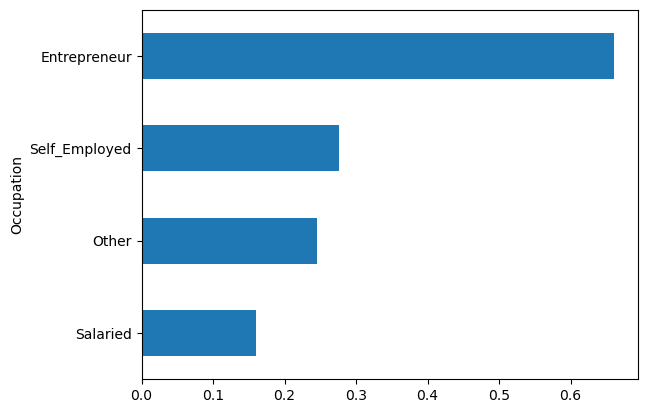

In [83]:
data.groupby('Occupation')['Is_Lead'].mean().sort_values().plot(kind = 'barh')    #special code just for inference

In [84]:
#Is_Active vs Is_Lead
contingency_table = pd.crosstab(data['Is_Active'], data['Is_Lead'])
print(contingency_table)

Is_Lead         0      1
Is_Active               
No         119007  31283
Yes         68430  27005


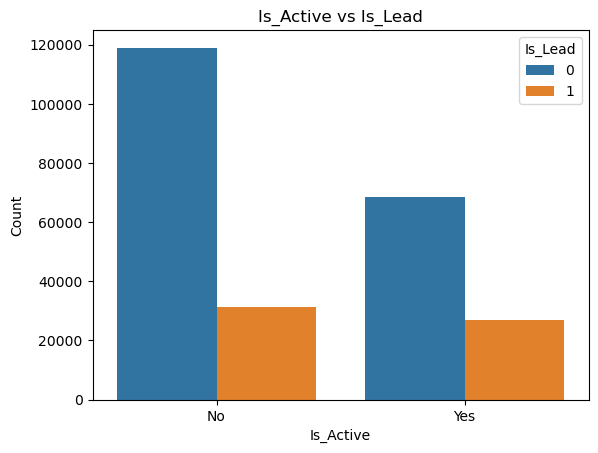

In [85]:
sns.countplot(x='Is_Active', hue='Is_Lead', data=data)
plt.xlabel('Is_Active')
plt.ylabel('Count')
plt.title('Is_Active vs Is_Lead')
plt.show()

<Axes: ylabel='Is_Active'>

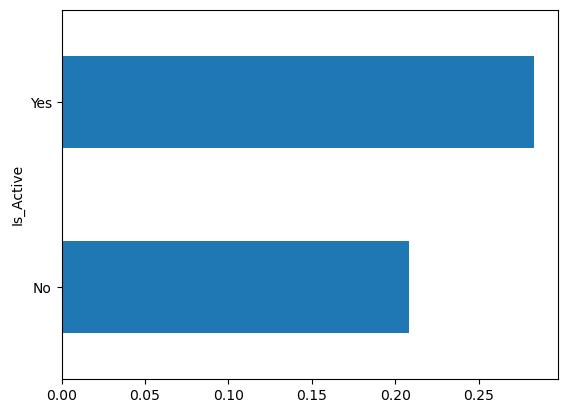

In [86]:
data.groupby('Is_Active')['Is_Lead'].mean().sort_values().plot(kind = 'barh')   #those who are  active are  more interested to take the credit card

In [87]:
#Credit Product vs Is_Lead                  #

In [88]:
contingency_table = pd.crosstab(data['Credit_Product'], data['Is_Lead'])
print(contingency_table)

Is_Lead              0      1
Credit_Product               
No              133734  10623
Yes              49353  22690


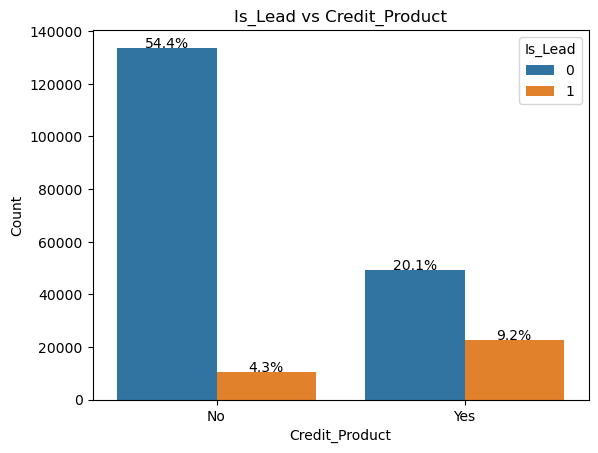

In [89]:
# Create the countplot
ax = sns.countplot(x='Credit_Product', hue='Is_Lead', data=data)

# Add percentages above the bars
total = len(data)  # Total number of data points
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{height/total:.1%}', ha="center")

# Set labels and title
plt.xlabel('Credit_Product')
plt.ylabel('Count')
plt.title('Is_Lead vs Credit_Product')
plt.legend(title='Is_Lead')

# Show the plot
plt.show()


In [90]:
#Channel_Code vs Is_Lead              

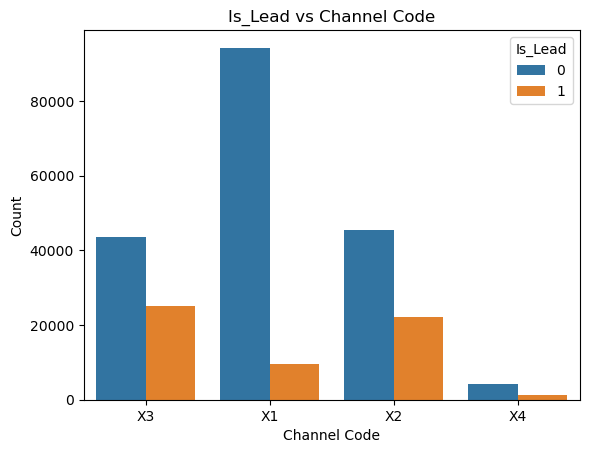

In [91]:
sns.countplot(x='Channel_Code', hue='Is_Lead', data=data)
plt.xlabel('Channel Code')
plt.ylabel('Count')
plt.title('Is_Lead vs Channel Code')
plt.legend(title='Is_Lead')
plt.show()

#People using channel code X3 are most interested to take the credit card ,while those opting channel code x1 are least interested

<Axes: ylabel='Channel_Code'>

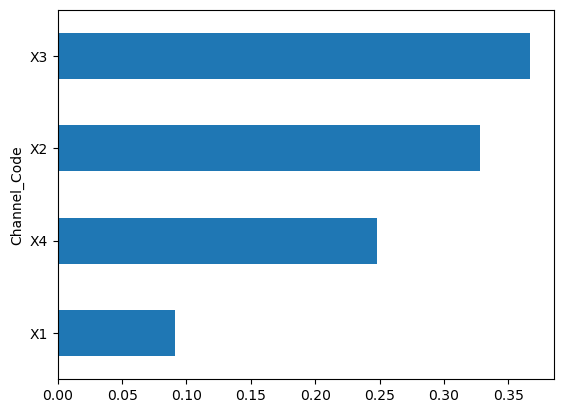

In [92]:
data.groupby('Channel_Code')['Is_Lead'].mean().sort_values().plot(kind = 'barh')

In [93]:
contingency_table = pd.crosstab(data['Channel_Code'], data['Is_Lead'])
print(contingency_table)

#just for explanation , count plot and bar post contingency table are same

Is_Lead           0      1
Channel_Code              
X1            94236   9482
X2            45519  22207
X3            43493  25219
X4             4189   1380


In [94]:
#Age vs Is_Lead

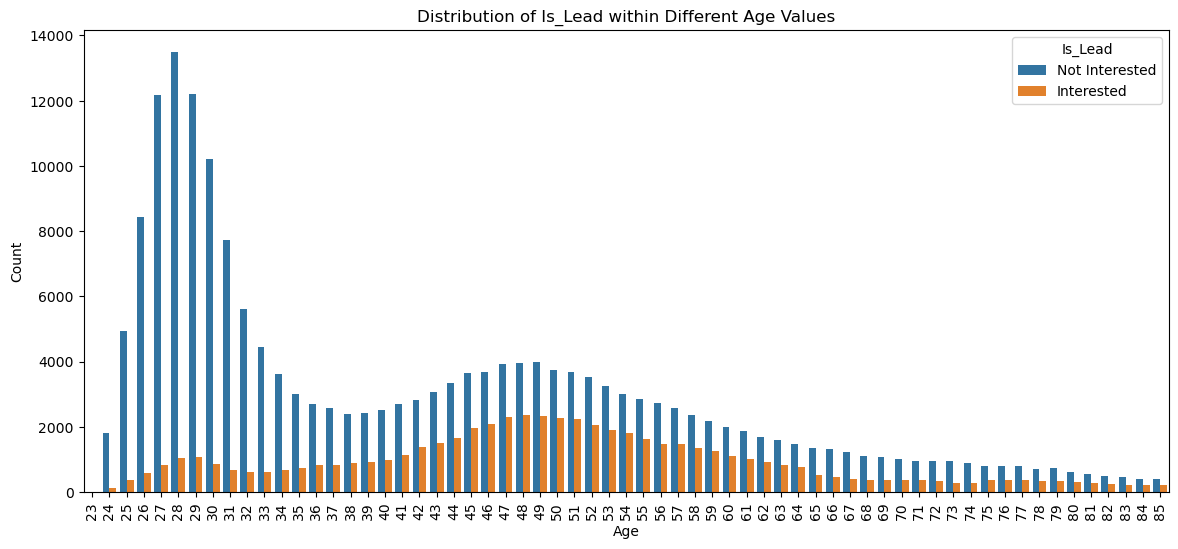

In [95]:
# Create a bar plot to visualize the distribution of Is_Lead within different age values
plt.figure(figsize=(14, 6))
sns.countplot(x='Age', hue='Is_Lead', data=data)
plt.title('Distribution of Is_Lead within Different Age Values')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Is_Lead', labels=['Not Interested', 'Interested'])
plt.xticks(rotation=90)
plt.show()

#Younger people are least interested in taking credit card, but as people get older the interest to take the credit card seems to increase

**Bivariate Analysis on Age vs Occupation**

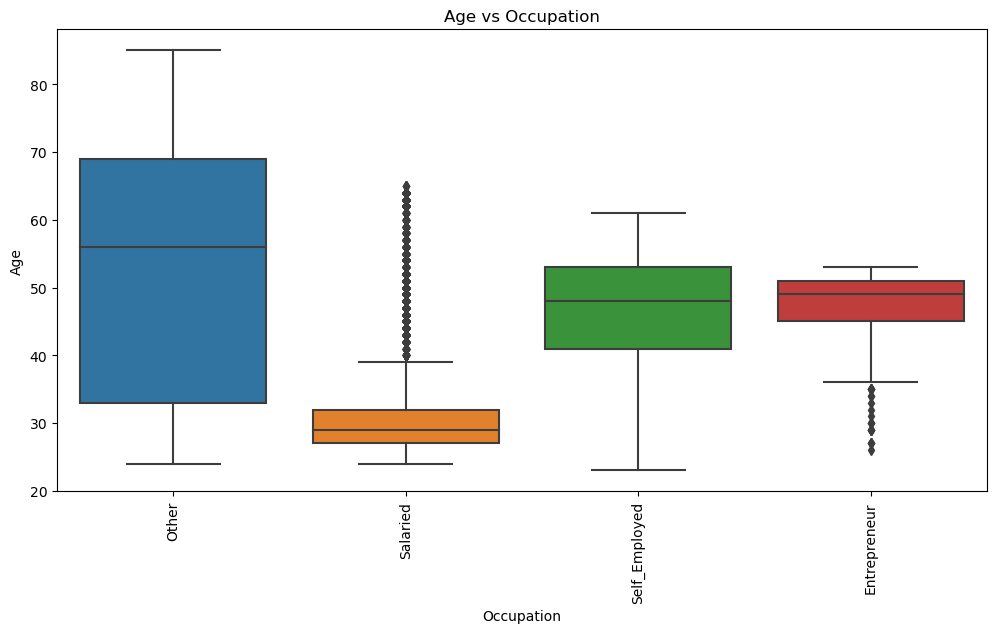

In [96]:
# Age vs Occupation
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['Occupation'], y=data['Age'])
plt.title('Age vs Occupation')
plt.xlabel('Occupation')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

#Younger people are salaried , older ones are engaged in other occupation

**Bivariate Analysis on Occupation vs Channel_Code**

In [97]:
contingency_table = pd.crosstab(data['Occupation'], data['Channel_Code'])
print(contingency_table)

Channel_Code      X1     X2     X3    X4
Occupation                              
Entrepreneur     181   1052   1358    76
Other          23903  19364  25561  1345
Salaried       63021   3662   4703   613
Self_Employed  16613  43648  37090  3535


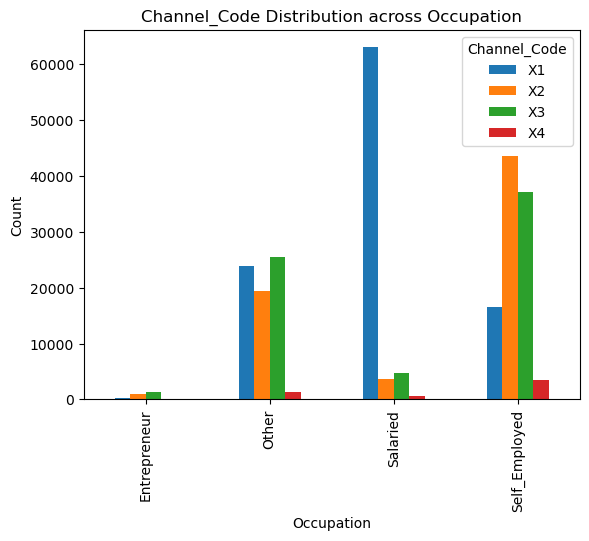

In [98]:
contingency_table.plot(kind='bar')

plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Channel_Code Distribution across Occupation')
plt.show()

#Salaried are preferring x1 channel code the most ,x4 is least preferred by all .

In [99]:
data.isna().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

**Data Preprocessing**

In [100]:
print("Percentage of missing values in each column:")
print(100 * data.isnull().sum() / len(data))     #dividing the count of missing values by the total number of rows and then multiplying by 100.

Percentage of missing values in each column:
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64


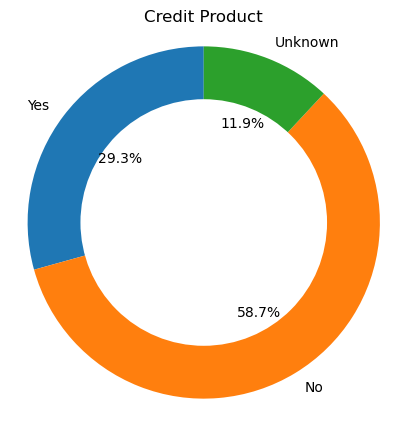

In [101]:


# Assuming 'data' is the DataFrame containing the relevant data

# Count occurrences of 'Yes', 'No', and missing (Unknown) values
yes_count = (data['Credit_Product'] == 'Yes').sum()
no_count = (data['Credit_Product'] == 'No').sum()
null_count = data['Credit_Product'].isnull().sum()

# Create labels and values for the pie chart
categories = ['Yes', 'No', 'Unknown']
values = [yes_count, no_count, null_count]

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)  # Add a white circle at the center to create a donut-like appearance
plt.axis('equal')
plt.title('Credit Product')
plt.show()



In [102]:
data['Credit_Product'].mode()

0    No
Name: Credit_Product, dtype: object

In [103]:
# Assuming 'data' is the DataFrame that contains the data

# Filter the rows where 'Lead' is equal to 1
lead_1_data = data[data['Is_Lead'] == 1]

# Get the value counts of 'Credit_Product' in the filtered data
credit_product_counts = lead_1_data['Credit_Product'].value_counts()

print(credit_product_counts)

Yes    22690
No     10623
Name: Credit_Product, dtype: int64


In [104]:
lead_1_data['Credit_Product'].isna().sum()

24975

In [105]:
# Assuming 'data' is the DataFrame that contains the data

# Filter the rows where 'Lead' is equal to 0
lead_0_data = data[data['Is_Lead'] == 0]

# Get the value counts of 'Credit_Product' in the filtered data
credit_product_counts = lead_0_data['Credit_Product'].value_counts()

print(credit_product_counts)

No     133734
Yes     49353
Name: Credit_Product, dtype: int64


In [106]:
# Assuming 'data' is the DataFrame that contains both  lead_1_data and lead_0_data

# Fill missing values in 'Credit_Product' column with 'Yes' where Lead is 1
data.loc[data['Is_Lead']==1,'Credit_Product']=data.loc[data['Is_Lead'] == 1, 'Credit_Product'].fillna('Yes')

# Fill missing values in 'Credit_Product' column with 'No' where Lead is 0
data.loc[data['Is_Lead']==0,'Credit_Product']=data.loc[data['Is_Lead'] == 0, 'Credit_Product'].fillna('No')



In [107]:
lead_0_data['Credit_Product'].isna().sum()

4350

In [108]:
data

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...
245720,Male,51,RG284,Self_Employed,X3,109,No,1925586,No,0
245721,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [109]:
data.isna().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [110]:
data['Credit_Product'].value_counts()   #just for understanding purpose

No     148707
Yes     97018
Name: Credit_Product, dtype: int64

**Detection of Outliers**

In [111]:
data.dtypes

Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [112]:
#Is_Lead              #NO OUTLIERS WILL BE THERE
data['Is_Lead'].unique()

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'Boxplot for Vintage')

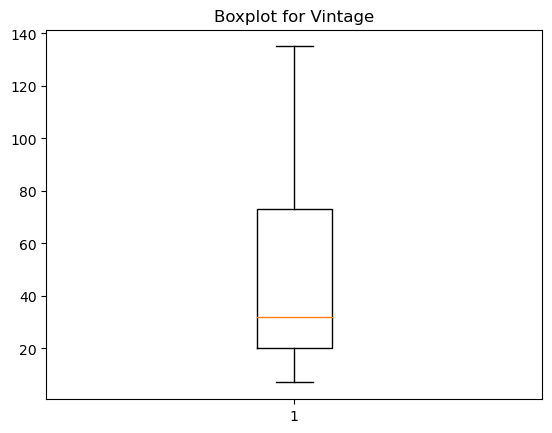

In [113]:
# vintage
plt.boxplot(data['Vintage'])
plt.title('Boxplot for Vintage')

Text(0.5, 1.0, 'Box plot of Age')

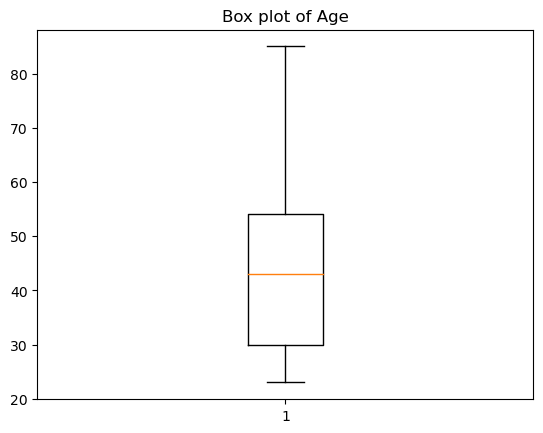

In [114]:
#Age
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

Text(0.5, 1.0, 'Box plot of Avg_Account_Balance')

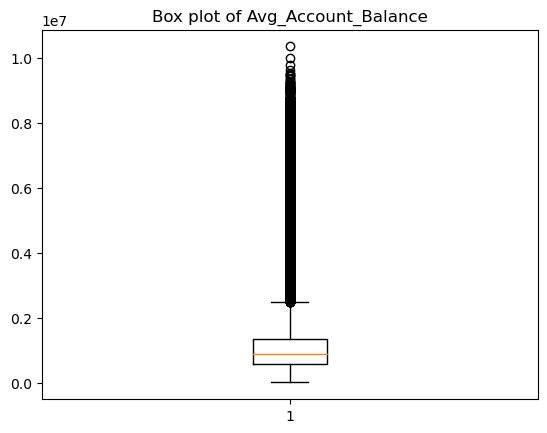

In [115]:
# avg account balance:
plt.boxplot(data['Avg_Account_Balance'])
plt.title('Box plot of Avg_Account_Balance')

In [116]:
q1 = np.percentile(data['Avg_Account_Balance'], 25)
q2 = np.percentile(data['Avg_Account_Balance'], 50)
q3 = np.percentile(data['Avg_Account_Balance'], 75)

In [117]:
iqr=q3-q1

In [118]:
low_limit = q1 - 1.5*iqr
upr_limit = q3 + 1.5*iqr

In [119]:
low_limit

-539224.0

In [120]:
upr_limit

2510200.0

In [121]:
outlier=[]
for x in data['Avg_Account_Balance']:
    if x>upr_limit or x<low_limit:
        outlier.append(x)

In [122]:
outlier

[2521592,
 2824468,
 6278683,
 5878049,
 2952343,
 5950700,
 2601656,
 3949713,
 3123134,
 2729727,
 2555270,
 3850567,
 2944493,
 2933466,
 3831583,
 3540669,
 2561687,
 2872448,
 3800193,
 3051160,
 3278386,
 4125595,
 3005209,
 7880380,
 3195126,
 2768985,
 3449426,
 3646543,
 5857499,
 5182372,
 3969266,
 5273143,
 2983564,
 5752728,
 2772937,
 2938246,
 2544189,
 2790799,
 3768268,
 3929741,
 3287900,
 2919013,
 6588376,
 2563600,
 2826195,
 4067059,
 2741226,
 5420269,
 3459082,
 3879456,
 3578868,
 6722899,
 2662399,
 2845178,
 3407498,
 8256124,
 3441282,
 2612888,
 2777885,
 2772252,
 3413399,
 3798066,
 2618664,
 4425329,
 2756970,
 4419980,
 4793246,
 3148143,
 3116121,
 2862943,
 2602546,
 3440188,
 2727333,
 5026275,
 4948862,
 4818620,
 4210198,
 4022185,
 2818256,
 2857985,
 3649275,
 2708741,
 2720703,
 3907100,
 2730991,
 4597535,
 2689143,
 2629086,
 3820574,
 3296827,
 3033440,
 3940715,
 2574218,
 2696486,
 7414269,
 2948374,
 2724405,
 2934668,
 4433597,
 2984988,


In [123]:
ind1 = data['Avg_Account_Balance']>upr_limit
ind2= data['Avg_Account_Balance']<low_limit

In [124]:
data.loc[ind1].index

Int64Index([    35,     71,    113,    184,    205,    211,    214,    218,
               240,    262,
            ...
            245554, 245560, 245601, 245610, 245629, 245638, 245653, 245661,
            245676, 245701],
           dtype='int64', length=14612)

In [125]:
data.loc[ind2].index #no low outliers

Int64Index([], dtype='int64')

In [126]:
data[ind1]['Avg_Account_Balance']

35        2521592
71        2824468
113       6278683
184       5878049
205       2952343
           ...   
245638    5396737
245653    6900312
245661    3566719
245676    2769973
245701    9491986
Name: Avg_Account_Balance, Length: 14612, dtype: int64

**ENCODING**

In [127]:
data['Region_Code'] = data['Region_Code'].str.replace('RG', '').astype(int)

In [128]:
data['Channel_Code'] = data['Channel_Code'].str.replace('X', '').astype(int)

In [129]:
data

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,268,Other,3,43,No,1045696,No,0
1,Female,30,277,Salaried,1,32,No,581988,No,0
2,Female,56,268,Self_Employed,3,26,No,1484315,Yes,0
3,Male,34,270,Salaried,1,19,No,470454,No,0
4,Female,30,282,Salaried,1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...
245720,Male,51,284,Self_Employed,3,109,No,1925586,No,0
245721,Male,27,268,Salaried,1,15,No,862952,Yes,0
245722,Female,26,281,Salaried,1,13,No,670659,No,0
245723,Female,28,273,Salaried,1,31,No,407504,No,0


In [130]:
#ONE HOT ENCODING USING SCIKIT LEARN

In [131]:
from sklearn.preprocessing import OneHotEncoder

# Select the categorical columns to encode
categorical_columns = ['Gender', 'Occupation', 'Is_Active', 'Credit_Product']

# Create a OneHotEncoder instance
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the encoder on the selected categorical columns
encoded_columns = encoder.fit_transform(data[categorical_columns])

# Create a DataFrame from the encoded_columns array with column names
encoded_data = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

# Drop the original categorical columns from 'data'
data.drop(categorical_columns, axis=1, inplace=True)

# Concatenate the original 'data' DataFrame with the encoded_data DataFrame
data = pd.concat([data, encoded_data], axis=1)

# Show the updated 'data' DataFrame
data

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes
0,73,268,3,43,1045696,0,0.0,1.0,0.0,0.0,0.0,0.0
1,30,277,1,32,581988,0,0.0,0.0,1.0,0.0,0.0,0.0
2,56,268,3,26,1484315,0,0.0,0.0,0.0,1.0,1.0,0.0
3,34,270,1,19,470454,0,1.0,0.0,1.0,0.0,0.0,0.0
4,30,282,1,33,886787,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,109,1925586,0,1.0,0.0,0.0,1.0,0.0,0.0
245721,27,268,1,15,862952,0,1.0,0.0,1.0,0.0,1.0,0.0
245722,26,281,1,13,670659,0,0.0,0.0,1.0,0.0,0.0,0.0
245723,28,273,1,31,407504,0,0.0,0.0,1.0,0.0,0.0,0.0


**HANDLING** **OUTLIERS**

***FILE CONTAINING CODES OF ALL OTHER METHODS OF HANDLING OUTLIERS IN ANOTHER FILE ***

**METHOD CHOSEN : LOG TRANSFORMATION**

In [132]:
#transformation technique
#log transformation:

# Log transformation on the "avg_account_balance" column
data["Avg_Account_Balance"] = data["Avg_Account_Balance"].map(lambda i: np.log(i) if i > 0 else 0)


In [133]:
data

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes
0,73,268,3,43,13.860193,0,0.0,1.0,0.0,0.0,0.0,0.0
1,30,277,1,32,13.274205,0,0.0,0.0,1.0,0.0,0.0,0.0
2,56,268,3,26,14.210464,0,0.0,0.0,0.0,1.0,1.0,0.0
3,34,270,1,19,13.061453,0,1.0,0.0,1.0,0.0,0.0,0.0
4,30,282,1,33,13.695360,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,109,14.470741,0,1.0,0.0,0.0,1.0,0.0,0.0
245721,27,268,1,15,13.668114,0,1.0,0.0,1.0,0.0,1.0,0.0
245722,26,281,1,13,13.416016,0,0.0,0.0,1.0,0.0,0.0,0.0
245723,28,273,1,31,12.917806,0,0.0,0.0,1.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Box Plot of Log-Transformed Avg_Account_Balance')

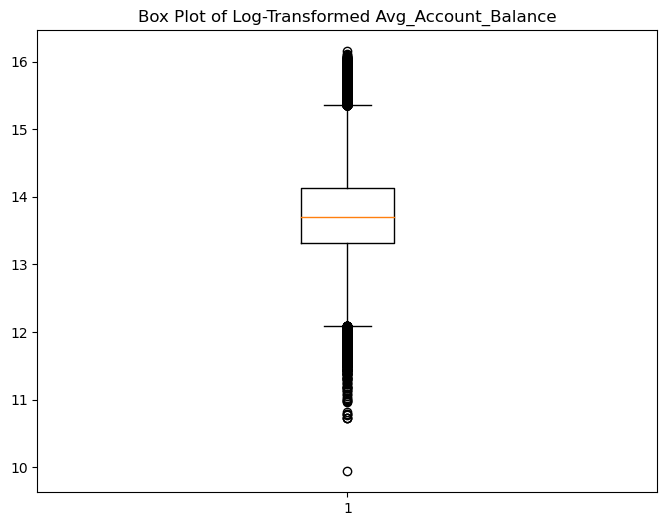

In [134]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['Avg_Account_Balance'])
plt.title('Box Plot of Log-Transformed Avg_Account_Balance')

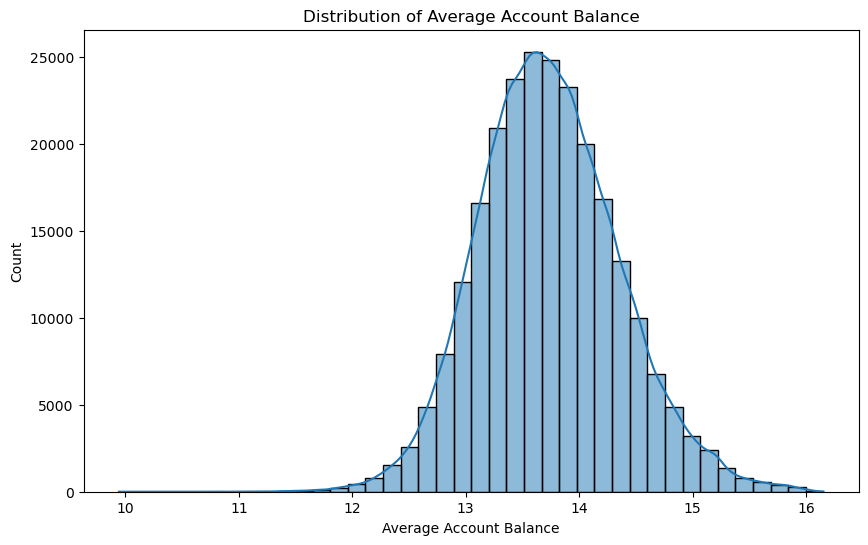

In [135]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Avg_Account_Balance'], bins=40, kde=True)
plt.xlabel('Average Account Balance')
plt.ylabel('Count')
plt.title('Distribution of Average Account Balance')
plt.show()     #normal distribution now post handling

**FEATURE** **ENGINEERING**

In [136]:
 #Assuming 'data' is your DataFrame, and 'Age' is the column representing ages
 # Define the bin edges and corresponding labels
age_bins = [0, 30, 50, float('inf')]  # Customize the age bins as per your preference
age_labels = ['Young', 'Middle-aged', 'Senior']

# Create the 'Age_Group' column based on the age bins
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)


In [137]:
data

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes,Age_Group
0,73,268,3,43,13.860193,0,0.0,1.0,0.0,0.0,0.0,0.0,Senior
1,30,277,1,32,13.274205,0,0.0,0.0,1.0,0.0,0.0,0.0,Middle-aged
2,56,268,3,26,14.210464,0,0.0,0.0,0.0,1.0,1.0,0.0,Senior
3,34,270,1,19,13.061453,0,1.0,0.0,1.0,0.0,0.0,0.0,Middle-aged
4,30,282,1,33,13.695360,0,0.0,0.0,1.0,0.0,0.0,0.0,Middle-aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,109,14.470741,0,1.0,0.0,0.0,1.0,0.0,0.0,Senior
245721,27,268,1,15,13.668114,0,1.0,0.0,1.0,0.0,1.0,0.0,Young
245722,26,281,1,13,13.416016,0,0.0,0.0,1.0,0.0,0.0,0.0,Young
245723,28,273,1,31,12.917806,0,0.0,0.0,1.0,0.0,0.0,0.0,Young


In [138]:
data.drop(columns=['Age'], inplace=True)

ONE HOT ENCODING FOR AGE GROUP

In [139]:
from sklearn.preprocessing import OneHotEncoder

# Select the categorical columns to encode
categorical_columns = [ 'Age_Group']

# Create a OneHotEncoder instance
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the encoder on the selected categorical columns
encoded_columns = encoder.fit_transform(data[categorical_columns])

# Create a DataFrame from the encoded_columns array with column names
encoded_data = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

# Drop the original categorical columns from 'data'
data.drop(categorical_columns, axis=1, inplace=True)

# Concatenate the original 'data' DataFrame with the encoded_data DataFrame
data = pd.concat([data, encoded_data], axis=1)


C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [140]:
data

,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes,Age_Group_Senior,Age_Group_Young
0,268,3,43,13.860193,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,277,1,32,13.274205,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,268,3,26,14.210464,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,270,1,19,13.061453,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,282,1,33,13.695360,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,284,3,109,14.470741,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
245721,268,1,15,13.668114,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
245722,281,1,13,13.416016,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
245723,273,1,31,12.917806,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [141]:
data.dtypes

Region_Code                   int32
Channel_Code                  int32
Vintage                       int64
Avg_Account_Balance         float64
Is_Lead                       int64
Gender_Male                 float64
Occupation_Other            float64
Occupation_Salaried         float64
Occupation_Self_Employed    float64
Is_Active_Yes               float64
Credit_Product_Yes          float64
Age_Group_Senior            float64
Age_Group_Young             float64
dtype: object

## **PREDICTIVE MODELLING AND FINE TUNING **

**TRAIN TEST SPLIT**

In [142]:
x=data.drop('Is_Lead',axis=1)

In [143]:
y=data['Is_Lead']

In [144]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [145]:
print("Number transactions X_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (196580, 12)
Number transactions y_train dataset:  (196580,)
Number transactions X_test dataset:  (49145, 12)
Number transactions y_test dataset:  (49145,)


## COMPARISON OF METRICS

In [146]:
#DECISION TREE

In [147]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [148]:
y_pred=dt_clf.predict(x_test)

In [149]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

Accuracy =  0.7627022077525689
Precision =  0.4984452474997899
Recall =  0.5101935483870967
F1 Score =  0.5042509777248767


In [150]:
#RANDOM FOREST

In [151]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [152]:
y_pred=rf_clf.predict(x_test)

In [153]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

Accuracy =  0.8120663343168176
Precision =  0.6196534107983572
Recall =  0.5321290322580645
F1 Score =  0.5725657164013329


In [154]:
#Naive Bayes

In [155]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
nb_clf = GaussianNB()

# Fit the Naive Bayes classifier to the training data
nb_clf.fit(x_train, y_train)

# Predict using the Naive Bayes classifier
y_pred = nb_clf.predict(x_test)


In [156]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

Accuracy =  0.7636585613999389
Precision =  0.5002952988424285
Recall =  0.7286881720430107
F1 Score =  0.59326960114858


In [157]:
#Gradient Boosting Machines (GBM)

In [158]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Gradient Boosting classifier
gbm_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier
gbm_clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred = gbm_clf.predict(x_test)

In [159]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

Accuracy =  0.8327805473598535
Precision =  0.6653722939520434
Recall =  0.5895913978494624
F1 Score =  0.6251938338046155


In [160]:
#on the basis of  f1 score , precision score metrics Gradient boosting machine is the best model.

ALL OTHER METHODS OF HANDLING IMBALNCED DATA IN ANOTHER FILE

# ***IMBALANCED DATA HANDLING -SMOTE ***

In [161]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

In [162]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 46663
Before OverSampling, counts of label '0': 149917 



In [163]:
print('After OverSampling, the shape of train_x: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


After OverSampling, the shape of train_x: (299834, 12)
After OverSampling, the shape of train_y: (299834,) 

After OverSampling, counts of label '1': 149917
After OverSampling, counts of label '0': 149917


In [164]:
#DECISION TREE

In [165]:
dt_clf_smote = DecisionTreeClassifier()
dt_clf_smote.fit(x_train_res, y_train_res)

DecisionTreeClassifier()

In [166]:
y_pred=dt_clf_smote.predict(x_test)

In [167]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

Accuracy =  0.7489876894902838
Precision =  0.47479617157036513
Recall =  0.5760860215053764
F1 Score =  0.5205596579867858


In [168]:
#RANDOM FOREST

In [169]:
rf_clf_smote = RandomForestClassifier()
rf_clf_smote.fit(x_train_res, y_train_res)

RandomForestClassifier()

In [170]:
y_pred=rf_clf_smote.predict(x_test)

In [171]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

Accuracy =  0.798107640655204
Precision =  0.5668105139270302
Recall =  0.6214193548387097
F1 Score =  0.5928600738613048


In [172]:
##Naive Bayes

In [173]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train_res, y_train_res)

GaussianNB()

In [174]:
y_pred = nb_classifier.predict(x_test)

In [175]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

Accuracy =  0.7254044155051379
Precision =  0.45458960660514813
Recall =  0.8051612903225807
F1 Score =  0.5810957628433959


In [176]:
##Gradient Boosting Machines (GBM)

In [177]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_classifier.fit(x_train_res, y_train_res)

GradientBoostingClassifier(random_state=42)

In [178]:
y_pred = gbm_classifier.predict(x_test)

In [179]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

Accuracy =  0.8040085461389765
Precision =  0.5620215348229289
Recall =  0.7767741935483871
F1 Score =  0.6521739130434783


In [180]:
# on the basis of SMOTE ,GBM IS THE BEST MODEL

*BEST MODEL:GBM , METHOD:SMOTE*

# ***CROSS VALIDATION ***

In [181]:
#SMOTE

In [182]:
#DECISION TREE

In [183]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [184]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, f1_score
from imblearn.over_sampling import SMOTE

# Assuming you have your features 'x' and target 'y'


# Initialize StratifiedKFold for stratified cross-validation with 5 folds
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a SMOTE instance
smote = SMOTE(random_state=42)

In [185]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the base estimator (Decision Tree)
base_estimator_dt = DecisionTreeClassifier(random_state=42)

# Initialize lists to store precision and F1 scores
precision_scores_dt = []
f1_scores_dt = []

# Perform stratified cross-validation
for train_index, test_index in stratified_kfold.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to the training data
    x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

    # Initialize the Decision Tree classifier
    dt_classifier = DecisionTreeClassifier(random_state=42)

    # Fit the classifier on the SMOTE-augmented training data
    dt_classifier.fit(x_train_smote, y_train_smote)

    # Predict on the test data
    y_pred = dt_classifier.predict(x_test)

    # Calculate precision and F1 scores
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision_scores_dt.append(precision)
    f1_scores_dt.append(f1)

# Print cross-validation precision scores for Decision Tree
print("Cross-Validation Precision Scores (Decision Tree):", precision_scores_dt)
print("Mean Precision (Decision Tree):", sum(precision_scores_dt) / len(precision_scores_dt))
print("Standard Deviation (Precision) (Decision Tree):", np.std(precision_scores_dt))

# Print cross-validation F1 scores for Decision Tree
print("Cross-Validation F1 Scores (Decision Tree):", f1_scores_dt)
print("Mean F1 Score (Decision Tree):", sum(f1_scores_dt) / len(f1_scores_dt))
print("Standard Deviation (F1) (Decision Tree):", np.std(f1_scores_dt))


Cross-Validation Precision Scores (Decision Tree): [0.4742073213410793, 0.4734173649742976, 0.4757564969740121, 0.47801736208345, 0.4755180244110133]
Mean Precision (Decision Tree): 0.4753833139567705
Standard Deviation (Precision) (Decision Tree): 0.0015712120186881394
Cross-Validation F1 Scores (Decision Tree): [0.5222787542399013, 0.5199938123598113, 0.5199393066957164, 0.5264050574358183, 0.5204660194174757]
Mean F1 Score (Decision Tree): 0.5218165900297447
Standard Deviation (F1) (Decision Tree): 0.0024469728655096452


In [186]:
#RANDOM FOREST

In [187]:
from sklearn.ensemble import RandomForestClassifier

In [188]:
# Initialize lists to store precision and F1 scores
precision_scores = []
f1_scores = []

# Perform stratified cross-validation
for train_index, test_index in stratified_kfold.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to the training data
    x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

    # Initialize the Random Forest classifier
    rf_classifier = RandomForestClassifier(random_state=42)

    # Fit the classifier on the SMOTE-augmented training data
    rf_classifier.fit(x_train_smote, y_train_smote)

    # Predict on the test data
    y_pred = rf_classifier.predict(x_test)

    # Calculate precision and F1 scores
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision_scores.append(precision)
    f1_scores.append(f1)

# Print cross-validation precision scores
print("Cross-Validation Precision Scores:", precision_scores)
print("Mean Precision:", sum(precision_scores) / len(precision_scores))
print("Standard Deviation (Precision):", (sum((x - sum(precision_scores) / len(precision_scores)) * 2 for x in precision_scores) / len(precision_scores)) * 0.5)

# Print cross-validation F1 scores
print("Cross-Validation F1 Scores:", f1_scores)
print("Mean F1 Score:", sum(f1_scores) / len(f1_scores))
print("Standard Deviation (F1):", (sum((x - sum(f1_scores) / len(f1_scores)) * 2 for x in f1_scores) / len(f1_scores)) * 0.5)

Cross-Validation Precision Scores: [0.5673498122653317, 0.5677264639900983, 0.5672917161167814, 0.569012547735952, 0.5674183514774495]
Mean Precision: 0.5677597783171225
Standard Deviation (Precision): 2.2204460492503132e-17
Cross-Validation F1 Scores: [0.5935109038091732, 0.5970549951187764, 0.5901963205333993, 0.5962677120339744, 0.5952361530304267]
Mean F1 Score: 0.5944532169051501
Standard Deviation (F1): -8.881784197001253e-17


In [189]:
#NAIVE BAYES

In [190]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, f1_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

# Assuming you have your features 'x' and target 'y'

# Initialize the base estimator (Naive Bayes)
base_estimator_nb = GaussianNB()

# Initialize StratifiedKFold for stratified cross-validation with 5 folds
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a SMOTE instance
smote = SMOTE(random_state=42)

# Initialize lists to store precision and F1 scores
precision_scores = []
f1_scores = []

# Perform stratified cross-validation
for train_index, test_index in stratified_kfold.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to the training data
    x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

    # Initialize the Naive Bayes classifier
    nb_classifier = GaussianNB()

    # Fit the classifier on the SMOTE-augmented training data
    nb_classifier.fit(x_train_smote, y_train_smote)

    # Predict on the test data
    y_pred = nb_classifier.predict(x_test)

    # Calculate precision and F1 scores
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision_scores.append(precision)
    f1_scores.append(f1)

# Print cross-validation precision scores
print("Cross-Validation Precision Scores:", precision_scores)
print("Mean Precision:", sum(precision_scores) / len(precision_scores))
print("Standard Deviation (Precision):", (sum((x - sum(precision_scores) / len(precision_scores)) ** 2 for x in precision_scores) / len(precision_scores)) ** 0.5)

# Print cross-validation F1 scores
print("Cross-Validation F1 Scores:", f1_scores)
print("Mean F1 Score:", sum(f1_scores) / len(f1_scores))
print("Standard Deviation (F1):", (sum((x - sum(f1_scores) / len(f1_scores)) ** 2 for x in f1_scores) / len(f1_scores)) ** 0.5)


Cross-Validation Precision Scores: [0.45167118337850043, 0.44888506899680086, 0.4512212747506865, 0.451949425508389, 0.45186857527139973]
Mean Precision: 0.4511191055811553
Standard Deviation (Precision): 0.0011451885339903358
Cross-Validation F1 Scores: [0.5812174977057204, 0.5767484662576687, 0.5778806108283201, 0.5792538279059737, 0.5793201133144475]
Mean F1 Score: 0.5788841032024261
Standard Deviation (F1): 0.0015059530661281463


In [191]:
#GBM

In [192]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the base estimator (Gradient Boosting)
base_estimator_gb = GradientBoostingClassifier(random_state=42)

# Initialize lists to store precision and F1 scores
precision_scores_gb = []
f1_scores_gb = []

# Perform stratified cross-validation
for train_index, test_index in stratified_kfold.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to the training data
    x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

    # Initialize the Gradient Boosting classifier
    gb_classifier = GradientBoostingClassifier(random_state=42)

    # Fit the classifier on the SMOTE-augmented training data
    gb_classifier.fit(x_train_smote, y_train_smote)

    # Predict on the test data
    y_pred = gb_classifier.predict(x_test)

    # Calculate precision and F1 scores
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision_scores_gb.append(precision)
    f1_scores_gb.append(f1)

# Print cross-validation precision scores for Gradient Boosting
print("Cross-Validation Precision Scores (Gradient Boosting):", precision_scores_gb)
print("Mean Precision (Gradient Boosting):", sum(precision_scores_gb) / len(precision_scores_gb))
print("Standard Deviation (Precision) (Gradient Boosting):", np.std(precision_scores_gb))

# Print cross-validation F1 scores for Gradient Boosting
print("Cross-Validation F1 Scores (Gradient Boosting):", f1_scores_gb)
print("Mean F1 Score (Gradient Boosting):", sum(f1_scores_gb) / len(f1_scores_gb))
print("Standard Deviation (F1) (Gradient Boosting):", np.std(f1_scores_gb))


Cross-Validation Precision Scores (Gradient Boosting): [0.5626863817097415, 0.5609241088063595, 0.5621376354928157, 0.5625620655412115, 0.5660165041260315]
Mean Precision (Gradient Boosting): 0.5628653391352318
Standard Deviation (Precision) (Gradient Boosting): 0.001694211864740039
Cross-Validation F1 Scores (Gradient Boosting): [0.6526861960869094, 0.6507439028783457, 0.6481145099178957, 0.6527907814187972, 0.6548058147103494]
Mean F1 Score (Gradient Boosting): 0.6518282410024595
Standard Deviation (F1) (Gradient Boosting): 0.0022581454294086714


**ON THE BASIS OF SMOTE CROSS VALIDATION -GBM PERFORMS WELL **

***HYPERPARAMETER TUNING IN ANOTHER FILE NAMED HYPERPARAMETER TUNING CODES ***

# *** MODEL BUILDING AND PICKLING  : ***

In [193]:
# AFTER HYPERPARAMETER TUNING USING BEST PARAMS

In [194]:
from sklearn.model_selection import StratifiedKFold

In [195]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score
import numpy as np
from imblearn.over_sampling import SMOTE

# Initialize StratifiedKFold for stratified cross-validation with 5 folds
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define Gradient Boosting parameters
gb_params = {
    'subsample': 1.0,
    'random_state': None,
    'n_estimators': 140,
    'min_samples_split': 10,
    'min_samples_leaf': 4,
    'max_features': None,
    'max_depth': 3,
    'learning_rate': 0.2
}

# Initialize lists to store scores
precision_scores_gb = []
f1_scores_gb = []
accuracy_scores_gb = []
recall_scores_gb = []

# Initialize SMOTE
smote = SMOTE()

# Perform stratified cross-validation
for train_index, test_index in stratified_kfold.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to the training data
    x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

    # Initialize the Gradient Boosting classifier
    gb_classifier = GradientBoostingClassifier(**gb_params)

    # Fit the classifier on the SMOTE-augmented training data
    gb_classifier.fit(x_train_smote, y_train_smote)

    # Predict on the test data
    y_pred = gb_classifier.predict(x_test)

    # Calculate scores
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    precision_scores_gb.append(precision)
    f1_scores_gb.append(f1)
    accuracy_scores_gb.append(accuracy)
    recall_scores_gb.append(recall)

# Print cross-validation precision scores for Gradient Boosting
print("Cross-Validation Precision Scores (Gradient Boosting):", precision_scores_gb)
print("Mean Precision (Gradient Boosting):", np.mean(precision_scores_gb))
print("Standard Deviation (Precision) (Gradient Boosting):", np.std(precision_scores_gb))

# Print cross-validation F1 scores for Gradient Boosting
print("Cross-Validation F1 Scores (Gradient Boosting):", f1_scores_gb)
print("Mean F1 Score (Gradient Boosting):", np.mean(f1_scores_gb))
print("Standard Deviation (F1) (Gradient Boosting):", np.std(f1_scores_gb))

# Print cross-validation accuracy scores for Gradient Boosting
print("Cross-Validation Accuracy Scores (Gradient Boosting):", accuracy_scores_gb)
print("Mean Accuracy (Gradient Boosting):", np.mean(accuracy_scores_gb))
print("Standard Deviation (Accuracy) (Gradient Boosting):", np.std(accuracy_scores_gb))

# Print cross-validation recall scores for Gradient Boosting
print("Cross-Validation Recall Scores (Gradient Boosting):", recall_scores_gb)
print("Mean Recall (Gradient Boosting):", np.mean(recall_scores_gb))
print("Standard Deviation (Recall) (Gradient Boosting):", np.std(recall_scores_gb))


Cross-Validation Precision Scores (Gradient Boosting): [0.5932342108852817, 0.595850622406639, 0.59768177028451, 0.5964401966895214, 0.6020828964842385]
Mean Precision (Gradient Boosting): 0.5970579393500381
Standard Deviation (Precision) (Gradient Boosting): 0.002901705664052944
Cross-Validation F1 Scores (Gradient Boosting): [0.6609673619818383, 0.6598001301834054, 0.6571660294288031, 0.6599992336283864, 0.6635085692278068]
Mean F1 Score (Gradient Boosting): 0.660288264890048
Standard Deviation (F1) (Gradient Boosting): 0.0020445880624403454
Cross-Validation Accuracy Scores (Gradient Boosting): [0.8184352426493031, 0.8192084647471767, 0.819371248346729, 0.8194526401465052, 0.8222199613388951]
Mean Accuracy (Gradient Boosting): 0.8197375114457218
Standard Deviation (Accuracy) (Gradient Boosting): 0.0012925673842616027
Cross-Validation Recall Scores (Gradient Boosting): [0.7461611049155014, 0.7391267049841297, 0.7297992794647452, 0.7387201921427347, 0.7388917481557729]
Mean Recall (Gra

In [196]:
import pickle
pickle.dump(gb_classifier,open('gb_classifier_raw.pkl','wb'))